In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df_init = pd.read_csv("data/lof/data-lof-2024-06-17.csv")
df = pd.read_csv("data/inc/data-inc-2024-06-24.csv")

In [3]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209852 entries, 0 to 209851
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        209852 non-null  int64  
 1   id_mls                    209852 non-null  object 
 2   bathrooms_total           209852 non-null  float64
 3   bedrooms_extra            209852 non-null  float64
 4   bedrooms                  209852 non-null  float64
 5   stories_total             209852 non-null  float64
 6   size_interior             209852 non-null  float64
 7   building_type             209852 non-null  object 
 8   agency_name               209852 non-null  object 
 9   agency_type               209852 non-null  object 
 10  property_type             209852 non-null  object 
 11  lng                       209852 non-null  float64
 12  lat                       209852 non-null  float64
 13  ownership_type            209852 non-null  o

# First Glance

In [4]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,27087943,24014260,2,3 + 0,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 642,Firm,Single Family,...,42.272117,Freehold,1,65X110,0,https://realtor.ca/real-estate/27087943/2845-v...,638549284776930000,N9E2B8,Ontario,649900.0
1,27087931,24014724,2,3 + 0,1.00,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.230144,Freehold,1,225X284.67,0,https://realtor.ca/real-estate/27087931/943-vi...,638549284705230000,N9H1W2,Ontario,949900.0
2,27087927,24014738,1,3 + 0,1.50,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.295951,Freehold,1,40.23X108.28,0,https://realtor.ca/real-estate/27087927/1156-c...,638549284689930000,N9B2Z9,Ontario,379900.0
3,27087924,24014742,2,2 + 0,NaN,1282.0000,Apartment,BOB PEDLER REAL ESTATE LIMITED,Firm,Single Family,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27087924/1225-r...,638549284679470000,N9A0A2,Ontario,649900.0
4,27087925,24014741,2,3 + 1,1.75,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.312619,Freehold,1,33.13X100.38 FT,0,https://realtor.ca/real-estate/27087925/191-br...,638549284682830000,N9B2M1,Ontario,324900.0


In [5]:
df.shape

(29393, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29393 entries, 0 to 29392
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        29393 non-null  int64  
 1   id_mls                    29393 non-null  object 
 2   bathrooms_total           29393 non-null  int64  
 3   bedrooms                  29393 non-null  object 
 4   stories_total             19043 non-null  float64
 5   size_interior             15413 non-null  object 
 6   building_type             29393 non-null  object 
 7   agency_name               29393 non-null  object 
 8   agency_type               29393 non-null  object 
 9   property_type             29393 non-null  object 
 10  lng                       29393 non-null  float64
 11  lat                       29393 non-null  float64
 12  ownership_type            29393 non-null  object 
 13  ownership_type_group_ids  29393 non-null  object 
 14  land_s

In [7]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
3,27087924,24014742,2,2 + 0,NaN,1282.0000,Apartment,BOB PEDLER REAL ESTATE LIMITED,Firm,Single Family,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27087924/1225-r...,638549284679470000,N9A0A2,Ontario,649900.0
22,27086818,24014691,2,2 + 0,NaN,1268.0000,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.316147,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27086818/150-pa...,638549176576700000,N9A7A2,Ontario,379000.0
23,27086817,24014693,2,2 + 0,NaN,1139.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.248917,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27086817/5840-n...,638549176574630000,N9J0E3,Ontario,499900.0
27,27083981,24014632,4,4 + 1,NaN,5616.0000,none,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.041612,Freehold,1,212.09X279.22,0,https://realtor.ca/real-estate/27083981/7971-c...,638548493106400000,N0R1G0,Ontario,1199888.0
30,27083333,24014623,1,1 + 0,NaN,770.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.319683,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27083333/75-riv...,638548456910570000,N9A7C4,Ontario,349900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29386,27069001,5857,2,3,NaN,1329 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.452653,none,none,4520,0,https://realtor.ca/real-estate/27069001/193-je...,638544966699300000,X1A3V5,Northwest Territories,389900.0
29388,27063704,5855,1,2,NaN,806 sqft,Apartment,RE/MAX North of 60,Firm,Single Family,...,62.454021,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27063704/b-5116...,638544189311070000,X1A1S7,Northwest Territories,309900.0
29389,27059268,5854,2,3,NaN,1076 sqft,Mobile Home,COLDWELL BANKER NBS,Firm,Single Family,...,62.444778,Condominium/Strata,2,3591,0,https://realtor.ca/real-estate/27059268/428-no...,638543409345030000,NaN,Northwest Territories,365000.0
29390,27058671,5853,2,3,NaN,2110 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.438617,Condominium/Strata,2,5815,0,https://realtor.ca/real-estate/27058671/840-du...,638543361323730000,NaN,Northwest Territories,549000.0


In [8]:
df_with_size["province"].value_counts()

province
British Columbia           4978
Ontario                    3892
Alberta                    3036
Quebec                     1451
Manitoba                    737
Saskatchewan                674
New Brunswick               457
Newfoundland & Labrador     165
Yukon                        12
Northwest Territories        11
Name: count, dtype: int64

In [9]:
df["province"].value_counts()

province
Ontario                    14204
British Columbia            5263
Quebec                      3426
Alberta                     3200
Manitoba                     816
Saskatchewan                 753
Nova Scotia                  686
New Brunswick                573
Prince Edward Island         237
Newfoundland & Labrador      207
Yukon                         16
Northwest Territories         12
Name: count, dtype: int64

In [10]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,29393.0,29393.0,19043.0,29393.0,29393.0,29393.0,2.939300e+04,29393.0
mean,27068923.0,2.0,2.0,-91.0,47.0,3.0,6.385451e+17,894991.0
std,11031.0,1.0,4.0,20.0,3.0,5.0,2.012335e+12,1084430.0
min,27049491.0,0.0,1.0,-139.0,42.0,0.0,6.385417e+17,1.0
25%,27059498.0,1.0,1.0,-114.0,44.0,0.0,6.385434e+17,429900.0
50%,27068986.0,2.0,2.0,-80.0,45.0,1.0,6.385450e+17,679000.0
75%,27078291.0,3.0,2.0,-79.0,49.0,4.0,6.385460e+17,1000000.0
max,27088131.0,28.0,208.0,-53.0,64.0,481.0,6.385493e+17,89000000.0


# Remove Duplicates

In [11]:
len(df["id"].unique())

29386

In [12]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

14


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
22635,27054554,R2895760,4,3,NaN,3217 sqft,House,RE/MAX All Points Realty,Firm,Single Family,...,49.254820,Freehold,1,5210 sqft,4,https://realtor.ca/real-estate/27054554/23185-...,638542652193400000,V4R2X3,British Columbia,1688000.0
22636,27054554,R2895760,4,3,NaN,3217 sqft,House,RE/MAX All Points Realty,Firm,Single Family,...,49.254820,Freehold,1,5210 sqft,4,https://realtor.ca/real-estate/27054554/23185-...,638542652193400000,V4R2X3,British Columbia,1688000.0
8156,27057430,E8452878,2,3 + 2,2.0,NaN,Row / Townhouse,HOMELIFE/FUTURE REALTY INC.,Firm,Single Family,...,43.817185,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/27057430/84-401...,638543288302500000,M1B5K6,Ontario,699998.0
8157,27057430,E8452878,2,3 + 2,2.0,NaN,Row / Townhouse,HOMELIFE/FUTURE REALTY INC.,Firm,Single Family,...,43.817185,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/27057430/84-401...,638543288302500000,M1B5K6,Ontario,699998.0
28602,27060077,E4393285,3,4,2.0,202.64 m2,House,2% Realty Pro,Firm,Single Family,...,53.441434,Freehold,1,374.36 m2,0,https://realtor.ca/real-estate/27060077/1427-3...,638543476291900000,T6T1A8,Alberta,628800.0
28603,27060077,E4393285,3,4,2.0,202.64 m2,House,2% Realty Pro,Firm,Single Family,...,53.441434,Freehold,1,374.36 m2,0,https://realtor.ca/real-estate/27060077/1427-3...,638543476291900000,T6T1A8,Alberta,628800.0
6356,27068437,C8460724,1,2,NaN,NaN,Apartment,HOMELIFE NEW WORLD REALTY INC.,Firm,Single Family,...,43.791319,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27068437/1008-1...,638544943440570000,M2J4S5,Ontario,689900.0
6359,27068437,C8460724,1,2,NaN,NaN,Apartment,HOMELIFE NEW WORLD REALTY INC.,Firm,Single Family,...,43.791319,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27068437/1008-1...,638544943440570000,M2J4S5,Ontario,689900.0
21635,27078173,R2897875,1,1,NaN,764 sqft,Apartment,RE/MAX Sabre Realty Group,Firm,Single Family,...,49.219323,Strata,2,0,1,https://realtor.ca/real-estate/27078173/305-11...,638546035498830000,V2X4N1,British Columbia,524900.0
21636,27078173,R2897875,1,1,NaN,764 sqft,Apartment,RE/MAX Sabre Realty Group,Firm,Single Family,...,49.219323,Strata,2,0,1,https://realtor.ca/real-estate/27078173/305-11...,638546035498830000,V2X4N1,British Columbia,524900.0


In [13]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
22636,27054554,R2895760,4,3,NaN,3217 sqft,House,RE/MAX All Points Realty,Firm,Single Family,...,49.254820,Freehold,1,5210 sqft,4,https://realtor.ca/real-estate/27054554/23185-...,638542652193400000,V4R2X3,British Columbia,1688000.0
8157,27057430,E8452878,2,3 + 2,2.0,NaN,Row / Townhouse,HOMELIFE/FUTURE REALTY INC.,Firm,Single Family,...,43.817185,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/27057430/84-401...,638543288302500000,M1B5K6,Ontario,699998.0
28603,27060077,E4393285,3,4,2.0,202.64 m2,House,2% Realty Pro,Firm,Single Family,...,53.441434,Freehold,1,374.36 m2,0,https://realtor.ca/real-estate/27060077/1427-3...,638543476291900000,T6T1A8,Alberta,628800.0
6359,27068437,C8460724,1,2,NaN,NaN,Apartment,HOMELIFE NEW WORLD REALTY INC.,Firm,Single Family,...,43.791319,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27068437/1008-1...,638544943440570000,M2J4S5,Ontario,689900.0
21636,27078173,R2897875,1,1,NaN,764 sqft,Apartment,RE/MAX Sabre Realty Group,Firm,Single Family,...,49.219323,Strata,2,0,1,https://realtor.ca/real-estate/27078173/305-11...,638546035498830000,V2X4N1,British Columbia,524900.0
28003,27080348,E4394048,4,4,2.0,167.83 m2,House,RE/MAX Elite,Firm,Single Family,...,53.568982,Freehold,1,NaN,0,https://realtor.ca/real-estate/27080348/edmonton,638546788266000000,T5M3H1,Alberta,659900.0
10380,27082310,N8471432,3,3 + 1,1.0,NaN,House,KELLER WILLIAMS REFERRED URBAN REALTY,Firm,Single Family,...,44.263864,Freehold,1,150.26 x 166.4 FT ; 213.71' X 166.4' at Sides ...,6,https://realtor.ca/real-estate/27082310/54-pri...,638548325333170000,L0M1M0,Ontario,929900.0


In [14]:
df = df.drop_duplicates(subset="id", keep=False)

In [15]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [16]:
# df = df.drop(["id", "id_mls"], axis=1)

In [17]:
df.shape

(29379, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29379 entries, 0 to 29392
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        29379 non-null  int64  
 1   id_mls                    29379 non-null  object 
 2   bathrooms_total           29379 non-null  int64  
 3   bedrooms                  29379 non-null  object 
 4   stories_total             19035 non-null  float64
 5   size_interior             15405 non-null  object 
 6   building_type             29379 non-null  object 
 7   agency_name               29379 non-null  object 
 8   agency_type               29379 non-null  object 
 9   property_type             29379 non-null  object 
 10  lng                       29379 non-null  float64
 11  lat                       29379 non-null  float64
 12  ownership_type            29379 non-null  object 
 13  ownership_type_group_ids  29379 non-null  object 
 14  land_size  

In [19]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  17300
Condominium/Strata         4548
none                       4125
Strata                     2342
Condominium                 541
Leasehold                   224
Freehold Condo               88
Leasehold Condo/Strata       47
Leasehold/Leased Land        45
Undivided Co-ownership       37
Shares in Co-operative       25
Other, See Remarks           18
Unknown                      17
Timeshare/Fractional         12
Life Lease                    7
Cooperative                   3
Name: count, dtype: int64

In [20]:
df["building_type"].value_counts()

building_type
House                         16775
Apartment                      5236
Row / Townhouse                3063
none                           2287
Duplex                          733
Mobile Home                     257
Manufactured Home               142
Triplex                         137
No Building                     136
Other                           118
Multi-Family                    118
Recreational                     96
Fourplex                         89
Unknown                          87
Manufactured Home/Mobile         37
Modular                          34
Parking                          11
Commercial Mix                   10
Two Apartment House               8
Park Model Mobile Home            3
Commercial Apartment              1
Residential Commercial Mix        1
Name: count, dtype: int64

In [21]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold                  68
none                      25
Condominium/Strata         7
Strata                     7
Shares in Co-operative     6
Leasehold/Leased Land      2
Leasehold                  1
Freehold Condo             1
Unknown                    1
Name: count, dtype: int64

In [22]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [23]:
df["property_type"].value_counts()

property_type
Single Family    26768
Vacant Land       1963
Multi-family       374
Agriculture        154
Recreational       109
Parking             11
Name: count, dtype: int64

In [24]:
df[df["property_type"] == "Business"]["page_url"]

Series([], Name: page_url, dtype: object)

In [25]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [26]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [27]:
df_sf = df[df["property_type"] == "Single Family"]

In [28]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26768 entries, 0 to 29391
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        26768 non-null  int64  
 1   id_mls                    26768 non-null  object 
 2   bathrooms_total           26768 non-null  int64  
 3   bedrooms                  26768 non-null  object 
 4   stories_total             18666 non-null  float64
 5   size_interior             15042 non-null  object 
 6   building_type             26768 non-null  object 
 7   agency_name               26768 non-null  object 
 8   agency_type               26768 non-null  object 
 9   property_type             26768 non-null  object 
 10  lng                       26768 non-null  float64
 11  lat                       26768 non-null  float64
 12  ownership_type            26768 non-null  object 
 13  ownership_type_group_ids  26768 non-null  object 
 14  land_size  

In [29]:
df_sf["province"].value_counts()

province
Ontario                    13287
British Columbia            4921
Alberta                     2997
Quebec                      2924
Manitoba                     732
Saskatchewan                 674
Nova Scotia                  512
New Brunswick                444
Newfoundland & Labrador      149
Prince Edward Island         103
Yukon                         13
Northwest Territories         12
Name: count, dtype: int64

In [30]:
df_sf["building_type"].value_counts()

building_type
House                       16750
Apartment                    5230
Row / Townhouse              3062
Duplex                        622
none                          403
Mobile Home                   257
Manufactured Home             140
Triplex                        93
Fourplex                       65
Recreational                   44
Manufactured Home/Mobile       37
Modular                        34
Other                          21
Two Apartment House             8
Unknown                         1
Multi-Family                    1
Name: count, dtype: int64

In [31]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  15963
Condominium/Strata         4520
none                       2943
Strata                     2315
Condominium                 538
Leasehold                   215
Freehold Condo               88
Leasehold Condo/Strata       46
Leasehold/Leased Land        41
Undivided Co-ownership       37
Shares in Co-operative       18
Other, See Remarks           13
Timeshare/Fractional         12
Unknown                       9
Life Lease                    7
Cooperative                   3
Name: count, dtype: int64

In [32]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
111,27067814,24014381,1,1 + 0,NaN,628.0000,none,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.097665,none,none,0X,0,https://realtor.ca/real-estate/27067814/120-pi...,638544892881030000,N9V3N3,Ontario,299900.0
327,27075118,24014511,1,2 + 0,1.0,NaN,House,PAUL BISTANY REAL ESTATE BROKER - 68,Firm,Single Family,...,42.301552,none,none,40.16X90.08,0,https://realtor.ca/real-estate/27075118/2559-f...,638545829069300000,N8W4T5,Ontario,314900.0
537,27055567,24014104,2,2 + 0,1.0,1704.0000,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.261812,none,none,38XIRREG,0,https://realtor.ca/real-estate/27055567/634-li...,638543128534830000,N6E3N7,Ontario,849900.0
549,27053222,24014069,1,1 + 0,NaN,NaN,none,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.012134,none,none,0X,0,https://realtor.ca/real-estate/27053222/176-pl...,638542516856600000,N0R1G0,Ontario,150000.0
589,27051211,24013994,2,2 + 0,NaN,NaN,Row / Townhouse,"BLUE COAST REALTY LTD, BROKERAGE",Firm,Single Family,...,42.967214,none,none,0X,0,https://realtor.ca/real-estate/27051211/847-ro...,638542377813470000,N7T7R1,Ontario,329900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29384,27070377,5859,2,3,NaN,1242 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.451990,none,none,5046,0,https://realtor.ca/real-estate/27070377/150-wi...,638545047362300000,NaN,Northwest Territories,419900.0
29385,27069585,5858,2,4,NaN,1181 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.453237,none,none,9009,0,https://realtor.ca/real-estate/27069585/5403-4...,638545012148330000,X1A1K7,Northwest Territories,649900.0
29386,27069001,5857,2,3,NaN,1329 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.452653,none,none,4520,0,https://realtor.ca/real-estate/27069001/193-je...,638544966699300000,X1A3V5,Northwest Territories,389900.0
29387,27064081,5856,2,3,NaN,NaN,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.443192,none,none,3653,0,https://realtor.ca/real-estate/27064081/242-fa...,638544225334900000,NaN,Northwest Territories,310000.0


In [33]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

111      https://realtor.ca/real-estate/27067814/120-pi...
327      https://realtor.ca/real-estate/27075118/2559-f...
537      https://realtor.ca/real-estate/27055567/634-li...
549      https://realtor.ca/real-estate/27053222/176-pl...
589      https://realtor.ca/real-estate/27051211/847-ro...
                               ...                        
29384    https://realtor.ca/real-estate/27070377/150-wi...
29385    https://realtor.ca/real-estate/27069585/5403-4...
29386    https://realtor.ca/real-estate/27069001/193-je...
29387    https://realtor.ca/real-estate/27064081/242-fa...
29391    https://realtor.ca/real-estate/27074542/21221-...
Name: page_url, Length: 2943, dtype: object

In [34]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

989      https://realtor.ca/real-estate/27083312/24-buc...
1254     https://realtor.ca/real-estate/27062796/4-mars...
1461     https://realtor.ca/real-estate/27070518/279-pe...
1475     https://realtor.ca/real-estate/27070128/2-ruth...
1506     https://realtor.ca/real-estate/27065349/79681-...
1528     https://realtor.ca/real-estate/27061985/49-che...
2266     https://realtor.ca/real-estate/27072486/1085-c...
2557     https://realtor.ca/real-estate/27065500/3-gold...
2631     https://realtor.ca/real-estate/27063721/580-be...
2688     https://realtor.ca/real-estate/27062538/10-pin...
2801     https://realtor.ca/real-estate/27059287/495856...
2881     https://realtor.ca/real-estate/27057156/8-dogw...
2971     https://realtor.ca/real-estate/27054761/126-ma...
3066     https://realtor.ca/real-estate/27051618/17-gol...
3131     https://realtor.ca/real-estate/27050306/2490-g...
4050     https://realtor.ca/real-estate/27082214/4449-m...
5382     https://realtor.ca/real-estate/27073740/1501-l.

In [35]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,504,252,5,1776,62,0,44,0,0,0,4,350,0,0,0,0
British Columbia,1538,153,3,2358,73,37,22,0,0,0,5,725,0,0,0,7
Manitoba,58,9,0,610,0,0,24,0,0,4,0,27,0,0,0,0
New Brunswick,2,0,0,409,0,0,15,0,0,0,0,8,0,0,0,10
Newfoundland & Labrador,0,0,0,139,0,0,1,0,1,0,0,0,0,8,0,0
Northwest Territories,2,0,0,5,3,0,2,0,0,0,0,0,0,0,0,0
Nova Scotia,15,5,0,431,0,0,17,0,0,0,32,7,0,0,0,5
Ontario,2368,59,5,8548,1,0,69,34,0,17,3,1829,24,0,1,329
Prince Edward Island,3,3,0,88,0,0,7,0,0,0,0,2,0,0,0,0


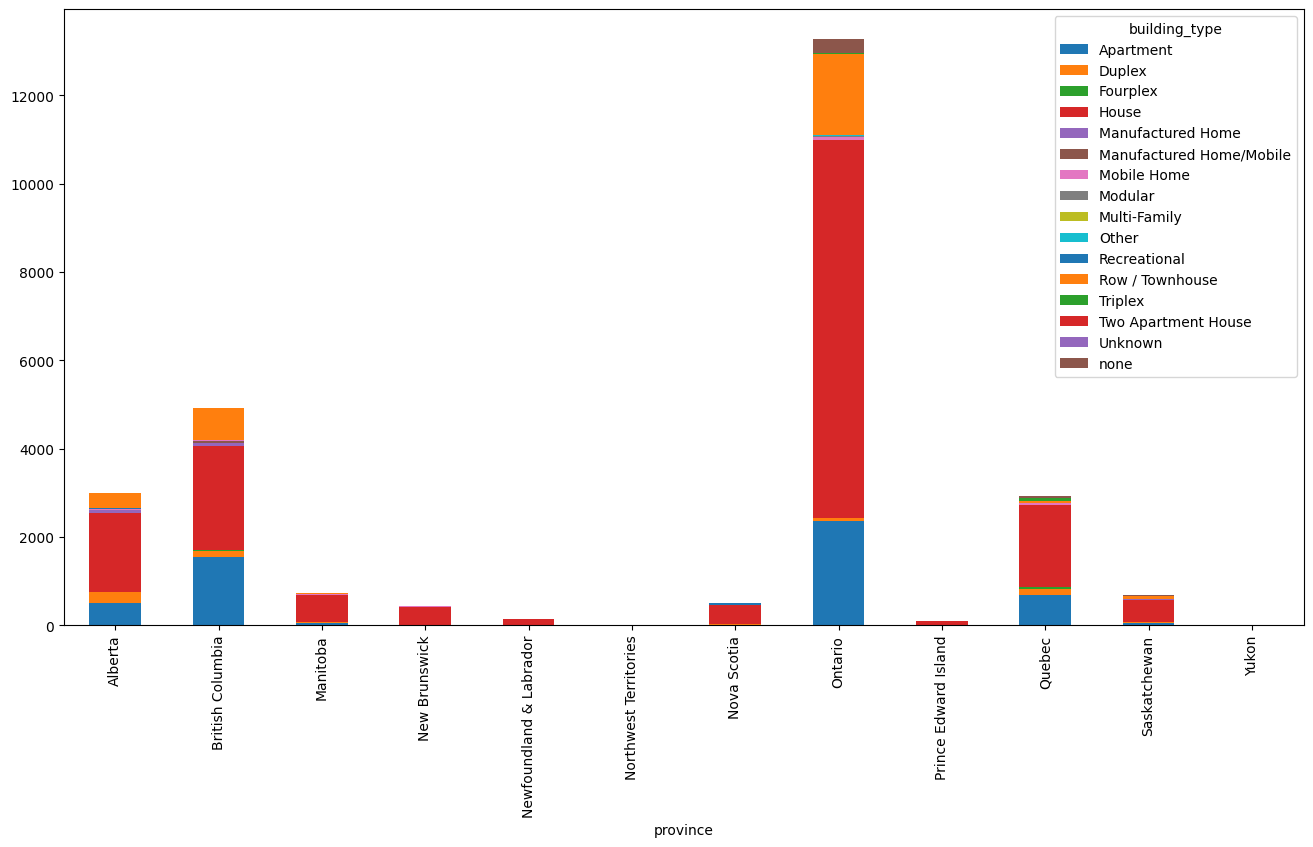

In [36]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

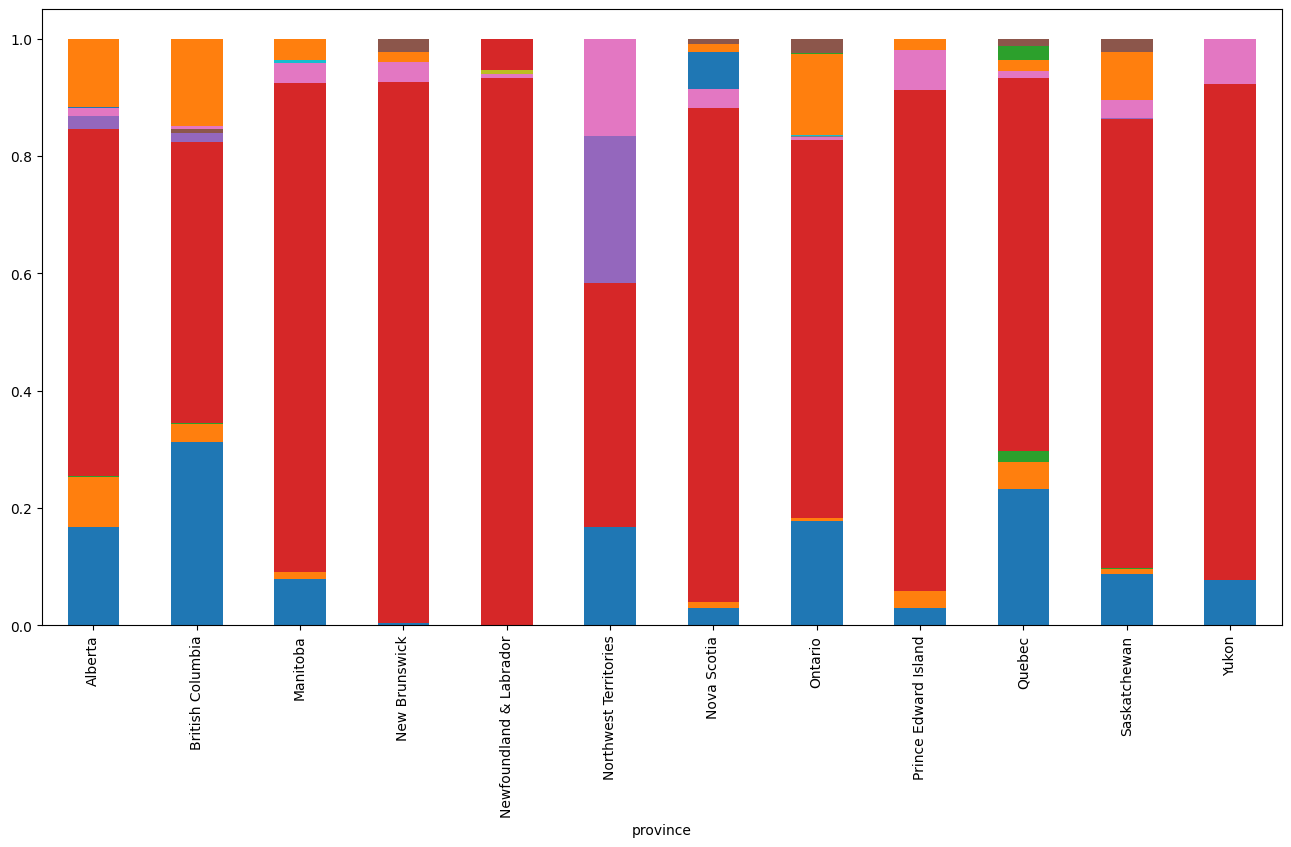

In [37]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [38]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,866,0,1978,0,18,0,0,0,0,0,0,0,0,0,135
British Columbia,0,65,0,2328,0,70,43,41,0,8,11,2315,5,0,5,30
Manitoba,0,2,0,617,88,21,0,0,1,0,0,0,0,0,3,0
New Brunswick,0,19,0,308,0,15,0,0,0,0,0,0,0,0,0,102
Newfoundland & Labrador,0,0,0,146,0,1,0,0,0,0,0,0,0,0,0,2
Northwest Territories,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,7
Nova Scotia,0,24,0,478,0,8,0,0,0,0,0,0,1,0,1,0
Ontario,538,2694,3,9458,0,71,3,0,6,5,7,0,4,7,0,491
Prince Edward Island,0,2,0,99,0,0,0,0,0,0,0,0,2,0,0,0


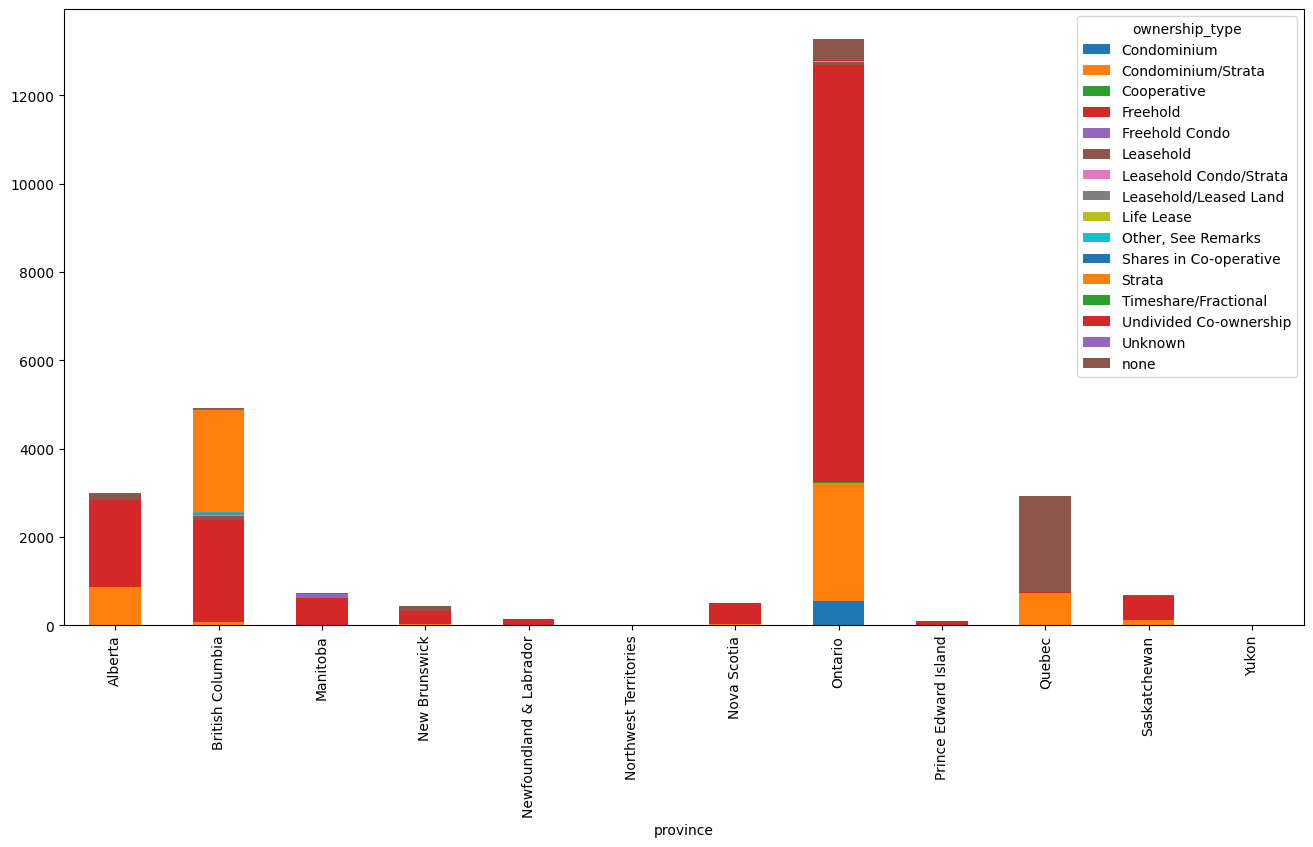

In [39]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

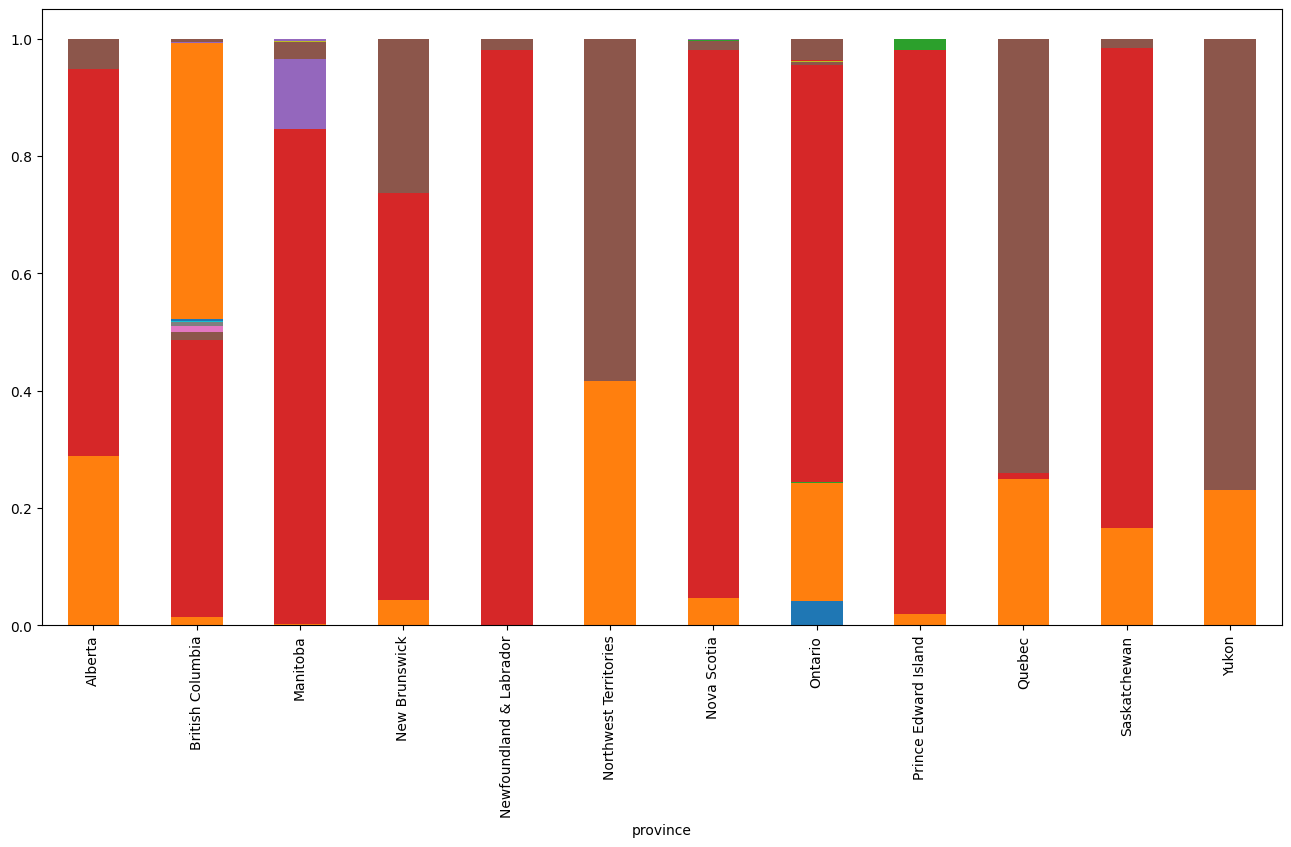

In [40]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [41]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        3293
Strata                    1414
Condominium                313
Freehold Condo              55
Undivided Co-ownership      37
Leasehold Condo/Strata      35
Freehold                    31
Leasehold/Leased Land       12
Shares in Co-operative      11
Timeshare/Fractional         9
Leasehold                    8
Life Lease                   6
none                         3
Unknown                      2
Other, See Remarks           1
Name: count, dtype: int64

In [42]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
Freehold                  287
none                      182
Strata                    100
Condominium/Strata         50
Timeshare/Fractional        1
Leasehold Condo/Strata      1
Leasehold                   1
Name: count, dtype: int64

In [43]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,Unknown,none
ownership_type,,,,,,,,,,,,,,,,
Condominium,313,0,0,13,0,0,0,0,0,0,0,207,0,0,0,5
Condominium/Strata,3293,50,0,94,6,0,3,0,0,7,3,1014,0,0,0,50
Cooperative,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0
Freehold,31,287,7,14240,65,20,58,6,1,3,38,1129,0,8,1,69
Freehold Condo,55,0,0,9,0,0,0,0,0,1,0,23,0,0,0,0
Leasehold,8,1,0,55,19,9,87,25,0,0,1,5,0,0,0,5
Leasehold Condo/Strata,35,1,0,1,1,1,0,0,0,0,0,5,0,0,0,2
Leasehold/Leased Land,12,0,0,18,8,0,0,0,0,0,0,3,0,0,0,0
Life Lease,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


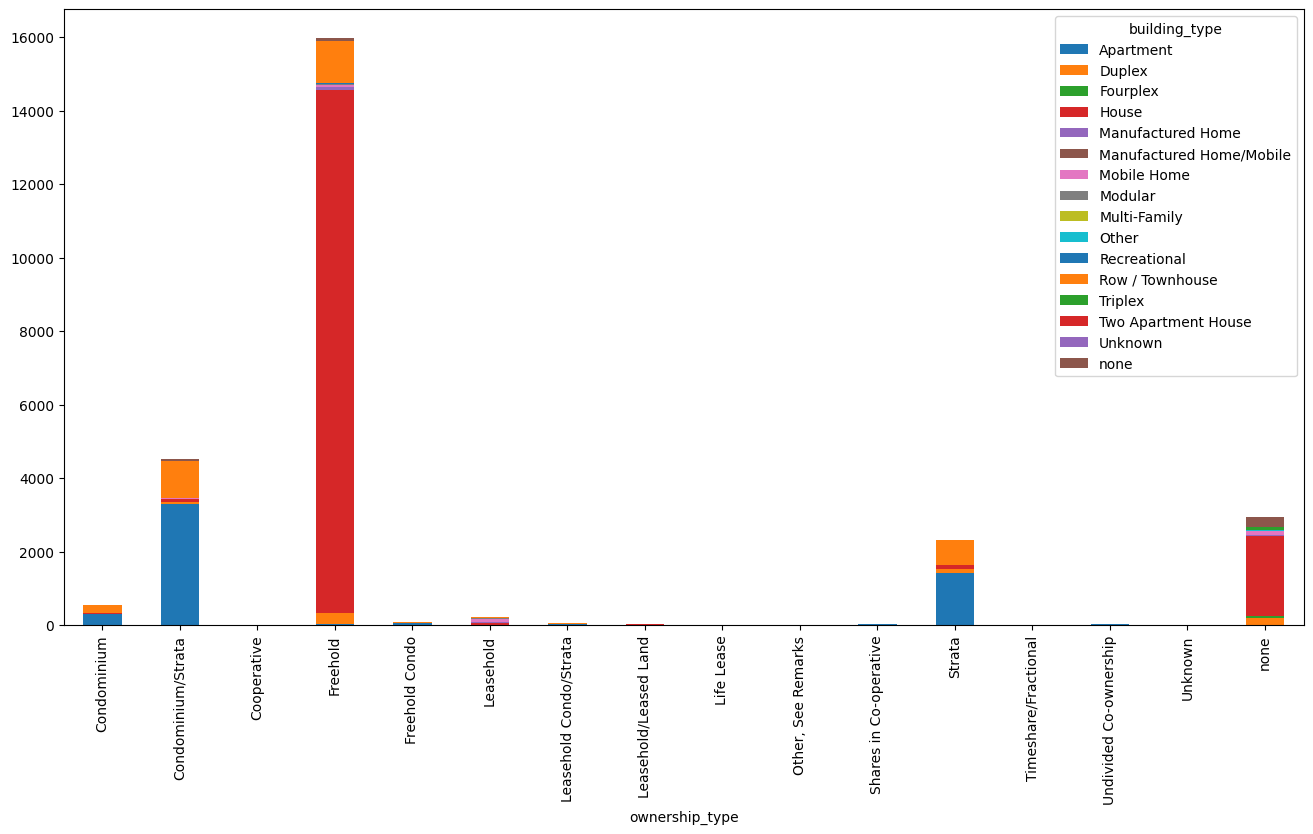

In [44]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

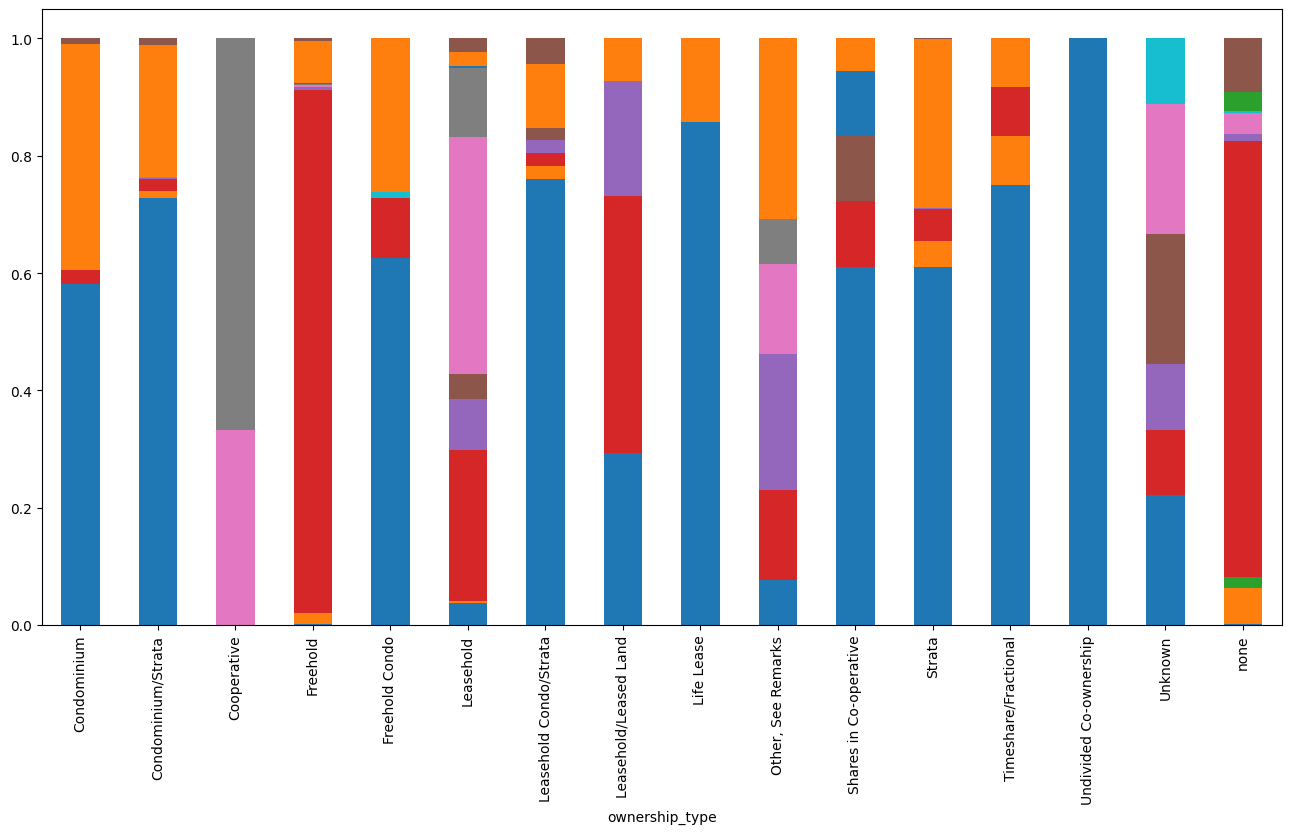

In [45]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [46]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,622.0,622.0,386.0,622.0,622.0,622.0,6.220000e+02,622.0
mean,27069334.0,3.0,2.0,-103.0,49.0,2.0,6.385451e+17,748413.0
std,10138.0,1.0,1.0,20.0,3.0,2.0,1.807637e+12,515806.0
min,27049661.0,0.0,1.0,-129.0,42.0,0.0,6.385418e+17,109000.0
25%,27060924.0,2.0,2.0,-118.0,46.0,0.0,6.385436e+17,401225.0
50%,27069736.0,3.0,2.0,-114.0,49.0,2.0,6.385450e+17,577000.0
75%,27078207.0,3.0,2.0,-79.0,52.0,3.0,6.385460e+17,899000.0
max,27088111.0,8.0,3.0,-60.0,57.0,12.0,6.385493e+17,4049000.0


In [47]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,93.0,93.0,63.0,93.0,93.0,93.0,9.300000e+01,93.0
mean,27069153.0,2.0,2.0,-75.0,45.0,3.0,6.385451e+17,942988.0
std,9958.0,1.0,1.0,3.0,1.0,3.0,1.754010e+12,483093.0
min,27049846.0,0.0,1.0,-81.0,43.0,0.0,6.385420e+17,235000.0
25%,27061169.0,1.0,2.0,-78.0,45.0,0.0,6.385437e+17,580000.0
50%,27070084.0,1.0,2.0,-74.0,46.0,2.0,6.385450e+17,895000.0
75%,27076752.0,3.0,3.0,-74.0,46.0,5.0,6.385459e+17,1150000.0
max,27087536.0,9.0,3.0,-71.0,47.0,13.0,6.385493e+17,2898000.0


In [48]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,65.0,65.0,37.0,65.0,65.0,65.0,6.500000e+01,65.0
mean,27067375.0,2.0,2.0,-79.0,47.0,4.0,6.385448e+17,916711.0
std,10365.0,2.0,0.0,15.0,3.0,4.0,1.812799e+12,622201.0
min,27049556.0,1.0,1.0,-120.0,43.0,0.0,6.385417e+17,199000.0
25%,27060001.0,1.0,2.0,-75.0,46.0,0.0,6.385435e+17,589000.0
50%,27066661.0,1.0,2.0,-74.0,46.0,4.0,6.385444e+17,849000.0
75%,27075333.0,2.0,2.0,-73.0,47.0,6.0,6.385459e+17,975000.0
max,27087340.0,12.0,3.0,-66.0,54.0,12.0,6.385493e+17,3690000.0


In [49]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,3062.0,3062.0,2228.0,3062.0,3062.0,3062.0,3.062000e+03,3062.0
mean,27069245.0,3.0,2.0,-94.0,46.0,2.0,6.385452e+17,794115.0
std,10903.0,1.0,1.0,20.0,3.0,9.0,1.988157e+12,450655.0
min,27049491.0,0.0,1.0,-127.0,42.0,0.0,6.385417e+17,2300.0
25%,27059655.0,2.0,2.0,-114.0,44.0,1.0,6.385434e+17,549900.0
50%,27069776.0,3.0,2.0,-80.0,44.0,2.0,6.385450e+17,720000.0
75%,27078194.0,3.0,3.0,-79.0,49.0,2.0,6.385460e+17,939900.0
max,27088119.0,7.0,32.0,-63.0,59.0,481.0,6.385493e+17,10800000.0


In [50]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       16750
Apartment                    5230
Row / Townhouse              3062
Semi-Detached                 780
none                          403
Mobile Home                   257
Manufactured Home             140
Recreational                   44
Manufactured Home/Mobile       37
Modular                        34
Other                          21
Two Apartment House             8
Unknown                         1
Multi-Family                    1
Name: count, dtype: int64

In [51]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              16750
Apartment           5230
Row / Townhouse     3062
Semi-Detached        780
Name: count, dtype: int64

In [52]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25822 entries, 0 to 29391
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        25822 non-null  int64  
 1   id_mls                    25822 non-null  object 
 2   bathrooms_total           25822 non-null  int64  
 3   bedrooms                  25822 non-null  object 
 4   stories_total             18042 non-null  float64
 5   size_interior             14387 non-null  object 
 6   building_type             25822 non-null  object 
 7   agency_name               25822 non-null  object 
 8   agency_type               25822 non-null  object 
 9   property_type             25822 non-null  object 
 10  lng                       25822 non-null  float64
 11  lat                       25822 non-null  float64
 12  ownership_type            25822 non-null  object 
 13  ownership_type_group_ids  25822 non-null  object 
 14  land_size  

In [53]:
df_bt["province"].value_counts()

province
Ontario                    12833
British Columbia            4777
Alberta                     2887
Quebec                      2853
Manitoba                     704
Saskatchewan                 637
Nova Scotia                  458
New Brunswick                419
Newfoundland & Labrador      139
Prince Edward Island          96
Yukon                         12
Northwest Territories          7
Name: count, dtype: int64

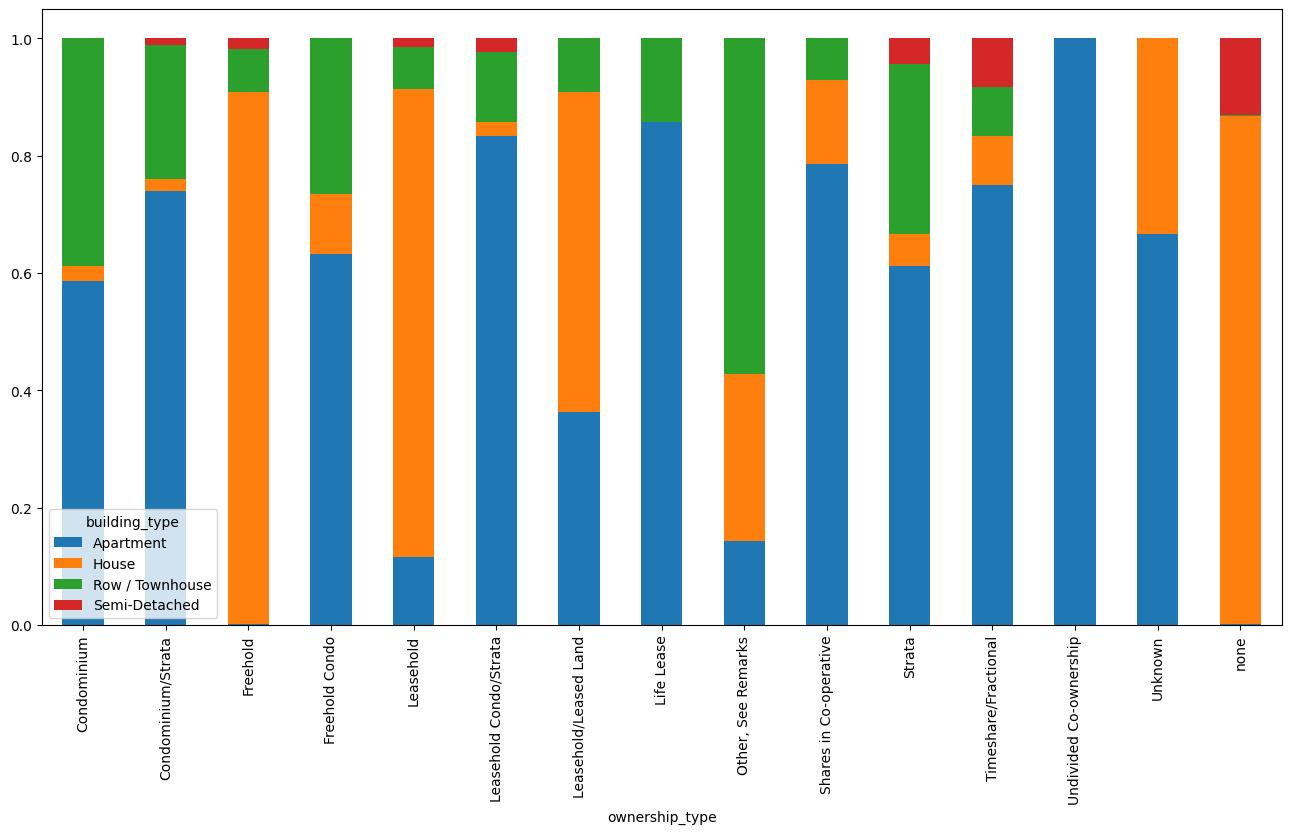

In [54]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [55]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          15694
2           7434
none        2533
4            102
1 2           37
3             12
2 3            7
1 2 3 4        3
Name: count, dtype: int64

In [56]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          14240
none        2191
2            244
4             73
3              1
1 2 3 4        1
Name: count, dtype: int64

In [57]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          5121
1 2          37
1            31
4            20
3             9
2 3           6
none          4
1 2 3 4       2
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none    331
1       294
2       153
3         1
4         1
Name: count, dtype: int64

In [59]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       1916
1       1129
4          8
none       7
3          1
2 3        1
Name: count, dtype: int64

In [60]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,15694.0,15694.0,12630.0,15694.0,15694.0,15694.0,1.569400e+04,15694.0
mean,27069072.0,3.0,2.0,-90.0,46.0,3.0,6.385452e+17,1067962.0
std,10975.0,1.0,1.0,19.0,4.0,4.0,2.009089e+12,1021172.0
min,27049494.0,0.0,1.0,-130.0,42.0,0.0,6.385417e+17,1.0
25%,27059638.0,2.0,1.0,-113.0,44.0,0.0,6.385434e+17,549900.0
50%,27069198.0,3.0,2.0,-80.0,44.0,3.0,6.385450e+17,819999.0
75%,27078106.0,4.0,2.0,-79.0,49.0,5.0,6.385460e+17,1268000.0
max,27088131.0,12.0,4.0,-53.0,59.0,101.0,6.385493e+17,25000000.0


In [61]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2533.0,2533.0,2282.0,2533.0,2533.0,2533.0,2.533000e+03,2533.0
mean,27068407.0,2.0,2.0,-75.0,46.0,4.0,6.385450e+17,671749.0
std,10751.0,1.0,1.0,10.0,2.0,4.0,1.901516e+12,549480.0
min,27049556.0,0.0,1.0,-138.0,42.0,0.0,6.385417e+17,15000.0
25%,27059925.0,1.0,1.0,-74.0,45.0,2.0,6.385435e+17,359900.0
50%,27068154.0,2.0,2.0,-74.0,46.0,4.0,6.385449e+17,539500.0
75%,27078320.0,2.0,2.0,-72.0,46.0,6.0,6.385460e+17,799000.0
max,27088122.0,12.0,3.0,-54.0,63.0,60.0,6.385493e+17,10900000.0


In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,12.0,12.0,6.0,12.0,12.0,12.0,1.200000e+01,12.0
mean,27066031.0,2.0,2.0,-94.0,47.0,0.0,6.385446e+17,294425.0
std,9984.0,2.0,1.0,27.0,2.0,1.0,1.680542e+12,347156.0
min,27050076.0,1.0,1.0,-125.0,45.0,0.0,6.385423e+17,47000.0
25%,27059832.0,1.0,1.0,-124.0,45.0,0.0,6.385435e+17,66750.0
50%,27064308.0,2.0,2.0,-80.0,46.0,0.0,6.385442e+17,126950.0
75%,27071483.0,3.0,2.0,-76.0,49.0,1.0,6.385452e+17,333750.0
max,27084363.0,8.0,2.0,-63.0,50.0,2.0,6.385485e+17,1099000.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,102.0,102.0,76.0,102.0,102.0,102.0,1.020000e+02,102.0
mean,27070320.0,2.0,2.0,-107.0,49.0,1.0,6.385453e+17,563911.0
std,10496.0,1.0,1.0,19.0,2.0,1.0,1.872516e+12,390666.0
min,27050362.0,1.0,1.0,-125.0,42.0,0.0,6.385423e+17,69900.0
25%,27061355.0,1.0,1.0,-122.0,47.0,0.0,6.385440e+17,299000.0
50%,27071580.0,2.0,1.0,-119.0,49.0,0.0,6.385451e+17,479950.0
75%,27078416.0,2.0,2.0,-86.0,50.0,2.0,6.385461e+17,694700.0
max,27087121.0,4.0,6.0,-66.0,54.0,5.0,6.385492e+17,2400000.0


In [64]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,3.0,3.0,1.0,3.0,3.0,3.0,3.000000e+00,3.0
mean,27081141.0,1.0,1.0,-114.0,49.0,0.0,6.385471e+17,330933.0
std,4474.0,0.0,NaN,15.0,0.0,1.0,1.411026e+12,50032.0
min,27077260.0,1.0,1.0,-123.0,49.0,0.0,6.385460e+17,279900.0
25%,27078694.0,1.0,1.0,-123.0,49.0,0.0,6.385463e+17,306450.0
50%,27080128.0,1.0,1.0,-123.0,49.0,0.0,6.385467e+17,333000.0
75%,27083082.0,1.0,1.0,-110.0,50.0,0.0,6.385477e+17,356450.0
max,27086035.0,1.0,1.0,-97.0,50.0,1.0,6.385487e+17,379900.0


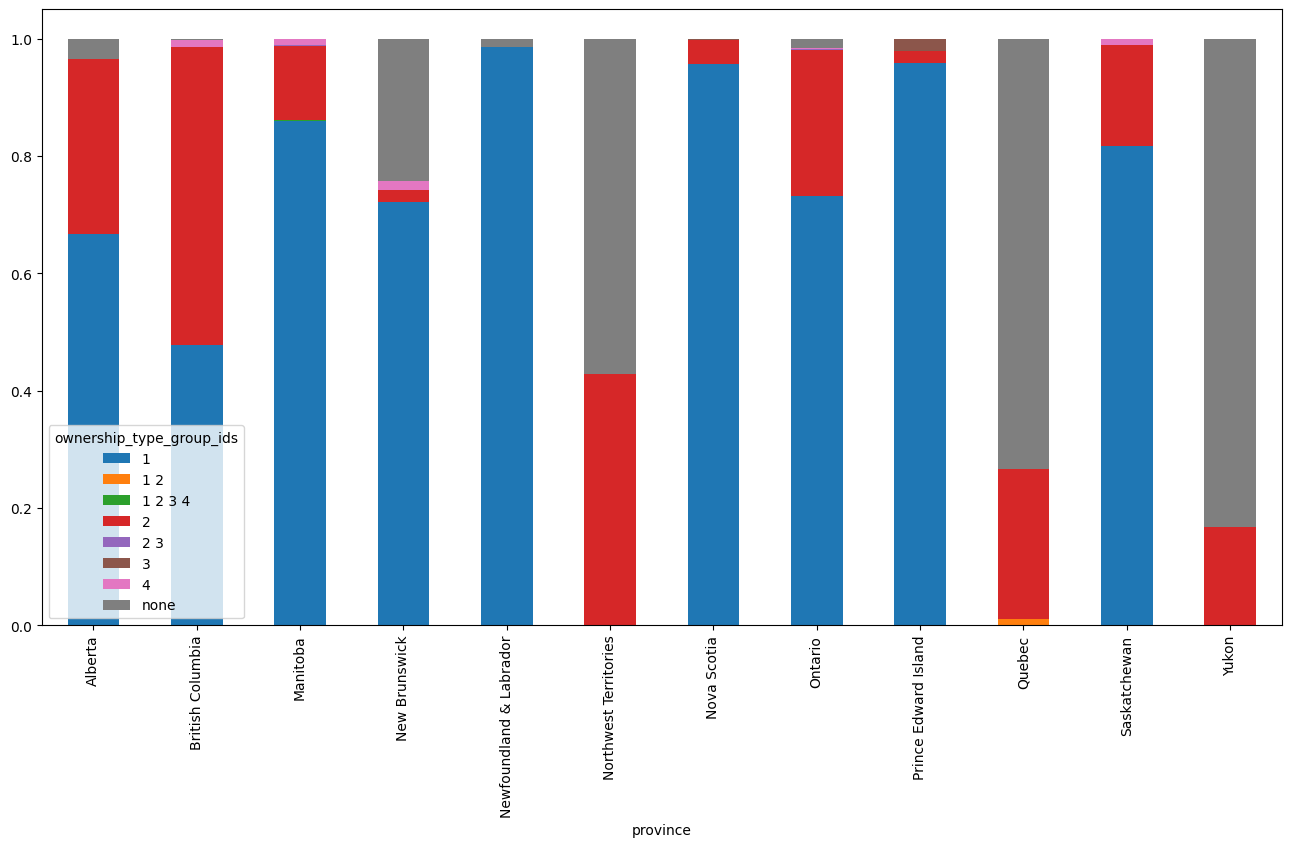

In [65]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [66]:
mask_other = ((df_bt["ownership_type_group_ids"] == "1") & (df_bt["ownership_type_group_ids"] == "2"))
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          15694
2           7434
none        2533
4            102
1 2           37
3             12
2 3            7
1 2 3 4        3
Name: count, dtype: int64

In [67]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)
df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 0: Other

/tmp/ipykernel_217957/3613108038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)


ownership_type_group_ids
1    15694
2     7434
Name: count, dtype: int64

In [68]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23128 entries, 0 to 29390
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        23128 non-null  int64  
 1   id_mls                    23128 non-null  object 
 2   bathrooms_total           23128 non-null  int64  
 3   bedrooms                  23128 non-null  object 
 4   stories_total             15645 non-null  float64
 5   size_interior             13311 non-null  object 
 6   building_type             23128 non-null  object 
 7   agency_name               23128 non-null  object 
 8   agency_type               23128 non-null  object 
 9   property_type             23128 non-null  object 
 10  lng                       23128 non-null  float64
 11  lat                       23128 non-null  float64
 12  ownership_type            23128 non-null  object 
 13  ownership_type_group_ids  23128 non-null  int64  
 14  land_size  

In [69]:
df_oti_new["province"].value_counts()

province
Ontario                    12585
British Columbia            4703
Alberta                     2784
Quebec                       728
Manitoba                     694
Saskatchewan                 630
Nova Scotia                  457
New Brunswick                311
Newfoundland & Labrador      137
Prince Edward Island          94
Northwest Territories          3
Yukon                          2
Name: count, dtype: int64

In [70]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [71]:
df = df_oti_new

In [72]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_217957/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    12873
True     10255
Name: count, dtype: int64

In [73]:
df.shape

(23128, 21)

In [74]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_217957/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,27087943,24014260,2,3 + 0,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 642,Firm,Single Family,...,42.272117,Freehold,1,65X110,0,https://realtor.ca/real-estate/27087943/2845-v...,638549284776930000,N9E2B8,Ontario,649900.0
1,27087931,24014724,2,3 + 0,1.00,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.230144,Freehold,1,225X284.67,0,https://realtor.ca/real-estate/27087931/943-vi...,638549284705230000,N9H1W2,Ontario,949900.0
2,27087927,24014738,1,3 + 0,1.50,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.295951,Freehold,1,40.23X108.28,0,https://realtor.ca/real-estate/27087927/1156-c...,638549284689930000,N9B2Z9,Ontario,379900.0
3,27087924,24014742,2,2 + 0,NaN,1282.0000,Apartment,BOB PEDLER REAL ESTATE LIMITED,Firm,Single Family,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27087924/1225-r...,638549284679470000,N9A0A2,Ontario,649900.0
4,27087925,24014741,2,3 + 1,1.75,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.312619,Freehold,1,33.13X100.38 FT,0,https://realtor.ca/real-estate/27087925/191-br...,638549284682830000,N9B2M1,Ontario,324900.0


In [75]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_217957/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [76]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [77]:
pd.DataFrame(bed_extra).value_counts()

0 
0     4281
1     4166
2     1505
3      264
4       35
5        3
21       1
Name: count, dtype: int64

In [78]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [79]:
len(bedrooms_extra)

23128

In [80]:
bedrooms_extra[:20]

['0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '2',
 '3',
 '1',
 '3',
 '0',
 '2',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0']

In [81]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [82]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,27087943,24014260,0,2,3 + 0,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 642,Firm,...,42.272117,Freehold,1,65X110,0,https://realtor.ca/real-estate/27087943/2845-v...,638549284776930000,N9E2B8,Ontario,649900.0
1,27087931,24014724,0,2,3 + 0,1.00,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.230144,Freehold,1,225X284.67,0,https://realtor.ca/real-estate/27087931/943-vi...,638549284705230000,N9H1W2,Ontario,949900.0
2,27087927,24014738,0,1,3 + 0,1.50,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.295951,Freehold,1,40.23X108.28,0,https://realtor.ca/real-estate/27087927/1156-c...,638549284689930000,N9B2Z9,Ontario,379900.0
3,27087924,24014742,0,2,2 + 0,NaN,1282.0000,Apartment,BOB PEDLER REAL ESTATE LIMITED,Firm,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27087924/1225-r...,638549284679470000,N9A0A2,Ontario,649900.0
4,27087925,24014741,1,2,3 + 1,1.75,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.312619,Freehold,1,33.13X100.38 FT,0,https://realtor.ca/real-estate/27087925/191-br...,638549284682830000,N9B2M1,Ontario,324900.0
5,27087923,24014745,1,2,2 + 1,NaN,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.214944,Freehold,1,33X118,0,https://realtor.ca/real-estate/27087923/405-je...,638549284674500000,N9J3X4,Ontario,519900.0
7,27087280,24014705,0,2,3 + 0,1.50,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.304870,Freehold,1,30.13X90.50,0,https://realtor.ca/real-estate/27087280/1390-h...,638549248808400000,N8X3T2,Ontario,289900.0
8,27087279,24014708,2,2,3 + 2,NaN,NaN,House,COLDWELL BANKER URBAN REALTY BROKERAGE,Firm,...,42.229012,Freehold,1,64.99X133.50,0,https://realtor.ca/real-estate/27087279/296-fi...,638549248798630000,N9J3S5,Ontario,699900.0
10,27087275,24014730,3,2,3 + 3,1.00,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.262562,Freehold,1,60X125,0,https://realtor.ca/real-estate/27087275/3296-m...,638549248760800000,N9E2R5,Ontario,599900.0
11,27087272,24014735,1,2,3 + 1,2.00,NaN,House,H. FEATHERSTONE REALTY INC. - 251,Firm,...,42.305883,Freehold,1,29.86X,0,https://realtor.ca/real-estate/27087272/1109-d...,638549248752600000,N9A4R5,Ontario,349900.0


In [83]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_217957/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23128 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        23128 non-null  int64  
 1   id_mls                    23128 non-null  object 
 2   bedrooms_extra            23128 non-null  object 
 3   bathrooms_total           23128 non-null  int64  
 4   bedrooms                  23128 non-null  object 
 5   stories_total             15645 non-null  float64
 6   size_interior             13311 non-null  object 
 7   building_type             23128 non-null  object 
 8   agency_name               23128 non-null  object 
 9   agency_type               23128 non-null  object 
 10  property_type             23128 non-null  object 
 11  lng                       23128 non-null  float64
 12  lat                       23128 non-null  float64
 13  ownership_type            23128 non-null  object 
 14  ownership_t

In [85]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_217957/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [86]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,27087943,24014260,0,2,3,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 642,Firm,...,42.272117,Freehold,1,65X110,0,https://realtor.ca/real-estate/27087943/2845-v...,638549284776930000,N9E2B8,Ontario,649900.0
1,27087931,24014724,0,2,3,1.00,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.230144,Freehold,1,225X284.67,0,https://realtor.ca/real-estate/27087931/943-vi...,638549284705230000,N9H1W2,Ontario,949900.0
2,27087927,24014738,0,1,3,1.50,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.295951,Freehold,1,40.23X108.28,0,https://realtor.ca/real-estate/27087927/1156-c...,638549284689930000,N9B2Z9,Ontario,379900.0
3,27087924,24014742,0,2,2,NaN,1282.0000,Apartment,BOB PEDLER REAL ESTATE LIMITED,Firm,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27087924/1225-r...,638549284679470000,N9A0A2,Ontario,649900.0
4,27087925,24014741,1,2,3,1.75,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.312619,Freehold,1,33.13X100.38 FT,0,https://realtor.ca/real-estate/27087925/191-br...,638549284682830000,N9B2M1,Ontario,324900.0
5,27087923,24014745,1,2,2,NaN,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.214944,Freehold,1,33X118,0,https://realtor.ca/real-estate/27087923/405-je...,638549284674500000,N9J3X4,Ontario,519900.0
7,27087280,24014705,0,2,3,1.50,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.304870,Freehold,1,30.13X90.50,0,https://realtor.ca/real-estate/27087280/1390-h...,638549248808400000,N8X3T2,Ontario,289900.0
8,27087279,24014708,2,2,3,NaN,NaN,House,COLDWELL BANKER URBAN REALTY BROKERAGE,Firm,...,42.229012,Freehold,1,64.99X133.50,0,https://realtor.ca/real-estate/27087279/296-fi...,638549248798630000,N9J3S5,Ontario,699900.0
10,27087275,24014730,3,2,3,1.00,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.262562,Freehold,1,60X125,0,https://realtor.ca/real-estate/27087275/3296-m...,638549248760800000,N9E2R5,Ontario,599900.0
11,27087272,24014735,1,2,3,2.00,NaN,House,H. FEATHERSTONE REALTY INC. - 251,Firm,...,42.305883,Freehold,1,29.86X,0,https://realtor.ca/real-estate/27087272/1109-d...,638549248752600000,N9A4R5,Ontario,349900.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23128 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        23128 non-null  int64  
 1   id_mls                    23128 non-null  object 
 2   bedrooms_extra            23128 non-null  int64  
 3   bathrooms_total           23128 non-null  int64  
 4   bedrooms                  23128 non-null  int64  
 5   stories_total             15645 non-null  float64
 6   size_interior             13311 non-null  object 
 7   building_type             23128 non-null  object 
 8   agency_name               23128 non-null  object 
 9   agency_type               23128 non-null  object 
 10  property_type             23128 non-null  object 
 11  lng                       23128 non-null  float64
 12  lat                       23128 non-null  float64
 13  ownership_type            23128 non-null  object 
 14  ownership_t

In [88]:
df["province"].value_counts()

province
Ontario                    12585
British Columbia            4703
Alberta                     2784
Quebec                       728
Manitoba                     694
Saskatchewan                 630
Nova Scotia                  457
New Brunswick                311
Newfoundland & Labrador      137
Prince Edward Island          94
Northwest Territories          3
Yukon                          2
Name: count, dtype: int64

## Handling Storeys

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23128 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        23128 non-null  int64  
 1   id_mls                    23128 non-null  object 
 2   bedrooms_extra            23128 non-null  int64  
 3   bathrooms_total           23128 non-null  int64  
 4   bedrooms                  23128 non-null  int64  
 5   stories_total             15645 non-null  float64
 6   size_interior             13311 non-null  object 
 7   building_type             23128 non-null  object 
 8   agency_name               23128 non-null  object 
 9   agency_type               23128 non-null  object 
 10  property_type             23128 non-null  object 
 11  lng                       23128 non-null  float64
 12  lat                       23128 non-null  float64
 13  ownership_type            23128 non-null  object 
 14  ownership_t

In [90]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,27087943,24014260,0,2,3,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 642,Firm,...,42.272117,Freehold,1,65X110,0,https://realtor.ca/real-estate/27087943/2845-v...,638549284776930000,N9E2B8,Ontario,649900.0
1,27087931,24014724,0,2,3,1.00,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.230144,Freehold,1,225X284.67,0,https://realtor.ca/real-estate/27087931/943-vi...,638549284705230000,N9H1W2,Ontario,949900.0
2,27087927,24014738,0,1,3,1.50,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.295951,Freehold,1,40.23X108.28,0,https://realtor.ca/real-estate/27087927/1156-c...,638549284689930000,N9B2Z9,Ontario,379900.0
3,27087924,24014742,0,2,2,NaN,1282.0000,Apartment,BOB PEDLER REAL ESTATE LIMITED,Firm,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27087924/1225-r...,638549284679470000,N9A0A2,Ontario,649900.0
4,27087925,24014741,1,2,3,1.75,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.312619,Freehold,1,33.13X100.38 FT,0,https://realtor.ca/real-estate/27087925/191-br...,638549284682830000,N9B2M1,Ontario,324900.0


In [91]:
df["stories_total"].value_counts().sort_index()

stories_total
1.00      5488
1.50       588
1.75        60
2.00      7386
2.50       184
3.00      1174
4.00       326
5.00        45
6.00        84
7.00        16
8.00        43
9.00        16
10.00       13
11.00        8
12.00       20
13.00        2
14.00       10
15.00       12
16.00       12
17.00        6
18.00        9
19.00        7
20.00        9
21.00       11
22.00        3
23.00       13
24.00        3
25.00        7
26.00       10
27.00        1
28.00        7
29.00        2
30.00        2
31.00        9
32.00        4
33.00        2
34.00        4
35.00        2
36.00        9
38.00        4
39.00        1
40.00        7
41.00        2
42.00        1
43.00        1
44.00        6
47.00        1
50.00        1
51.00        1
52.00        1
54.00        3
55.00        2
57.00        1
61.00        1
90.00        1
114.00       1
126.00       1
128.00       1
208.00       1
Name: count, dtype: int64

In [92]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
1.00     5488
1.50      588
1.75       60
2.00     7386
2.50      184
3.00     1174
4.00      326
5.00       45
6.00       84
7.00       16
8.00       43
9.00       16
10.00      13
11.00       8
12.00      20
13.00       2
14.00      10
15.00      12
16.00      12
17.00       6
Name: count, dtype: int64

In [93]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [94]:
df[df["stories_total"] == 0]["building_type"].value_counts()

Series([], Name: count, dtype: int64)

In [95]:
df[df["stories_total"] == 0]["page_url"]

Series([], Name: page_url, dtype: object)

In [96]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          3444
House              3054
Row / Townhouse     829
Semi-Detached       156
Name: count, dtype: int64

In [97]:
df[df["stories_total"].isna()]["page_url"]

3        https://realtor.ca/real-estate/27087924/1225-r...
5        https://realtor.ca/real-estate/27087923/405-je...
8        https://realtor.ca/real-estate/27087279/296-fi...
17       https://realtor.ca/real-estate/27087049/1124-c...
20       https://realtor.ca/real-estate/27086824/4661-s...
                               ...                        
29371    https://realtor.ca/real-estate/27084375/403-32...
29375    https://realtor.ca/real-estate/27070532/6-8-al...
29382    https://realtor.ca/real-estate/27083996/300-18...
29388    https://realtor.ca/real-estate/27063704/b-5116...
29390    https://realtor.ca/real-estate/27058671/840-du...
Name: page_url, Length: 7483, dtype: object

In [98]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23128 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        23128 non-null  int64  
 1   id_mls                    23128 non-null  object 
 2   bedrooms_extra            23128 non-null  int64  
 3   bathrooms_total           23128 non-null  int64  
 4   bedrooms                  23128 non-null  int64  
 5   stories_total             23128 non-null  float64
 6   size_interior             13311 non-null  object 
 7   building_type             23128 non-null  object 
 8   agency_name               23128 non-null  object 
 9   agency_type               23128 non-null  object 
 10  property_type             23128 non-null  object 
 11  lng                       23128 non-null  float64
 12  lat                       23128 non-null  float64
 13  ownership_type            23128 non-null  object 
 14  ownership_t

In [99]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     12971
2.00      7386
3.00      1174
1.50       588
4.00       326
2.50       184
6.00        84
1.75        60
5.00        45
8.00        43
12.00       20
9.00        16
7.00        16
10.00       13
23.00       13
15.00       12
16.00       12
21.00       11
14.00       10
26.00       10
Name: count, dtype: int64

In [100]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

432      https://realtor.ca/real-estate/27063554/741-br...
446      https://realtor.ca/real-estate/27062833/739-br...
627      https://realtor.ca/real-estate/27087990/966-ba...
931      https://realtor.ca/real-estate/27054275/281-ev...
1425     https://realtor.ca/real-estate/27076084/60-196...
                               ...                        
29330    https://realtor.ca/real-estate/27070303/157-wa...
29336    https://realtor.ca/real-estate/27063954/67-400...
29353    https://realtor.ca/real-estate/27077498/33-532...
29355    https://realtor.ca/real-estate/27063695/4612-b...
29357    https://realtor.ca/real-estate/27054077/5319-4...
Name: page_url, Length: 1174, dtype: object

In [101]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec                  541
Alberta                 324
British Columbia        199
Ontario                  81
Saskatchewan              3
Nova Scotia               1
Prince Edward Island      1
Name: count, dtype: int64

In [102]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

247      https://realtor.ca/real-estate/27084928/143-ch...
1909     https://realtor.ca/real-estate/27081201/321-sp...
1915     https://realtor.ca/real-estate/27081001/122-se...
2002     https://realtor.ca/real-estate/27078774/1909-5...
2013     https://realtor.ca/real-estate/27078411/50-gra...
                               ...                        
29338    https://realtor.ca/real-estate/27060876/126-20...
29343    https://realtor.ca/real-estate/27059173/313-11...
29344    https://realtor.ca/real-estate/27057746/1216-2...
29347    https://realtor.ca/real-estate/27054284/309-7-...
29352    https://realtor.ca/real-estate/27050383/2208-3...
Name: page_url, Length: 1150, dtype: object

In [103]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

0        False
1        False
2        False
3        False
4        False
         ...  
29371    False
29375    False
29382    False
29388    False
29390    False
Length: 23128, dtype: bool

In [104]:
~mask_apt_storey

0        True
1        True
2        True
3        True
4        True
         ... 
29371    True
29375    True
29382    True
29388    True
29390    True
Length: 23128, dtype: bool

In [105]:
df_storey[mask_apt_storey].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1150 entries, 247 to 29352
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1150 non-null   int64  
 1   id_mls                    1150 non-null   object 
 2   bedrooms_extra            1150 non-null   int64  
 3   bathrooms_total           1150 non-null   int64  
 4   bedrooms                  1150 non-null   int64  
 5   stories_total             1150 non-null   float64
 6   size_interior             1077 non-null   object 
 7   building_type             1150 non-null   object 
 8   agency_name               1150 non-null   object 
 9   agency_type               1150 non-null   object 
 10  property_type             1150 non-null   object 
 11  lng                       1150 non-null   float64
 12  lat                       1150 non-null   float64
 13  ownership_type            1150 non-null   object 
 14  ownership_

In [106]:
df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [107]:
# # set storeys for all appartments to 1
# df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [108]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     12971
2.00      7276
3.00       884
1.50       587
2.50       184
1.75        60
4.00        13
16.00        1
6.00         1
32.00        1
Name: count, dtype: int64

In [109]:
df_storey["stories_total"].unique()

array([ 1.  ,  1.5 ,  1.75,  2.  ,  2.5 ,  3.  ,  4.  , 16.  ,  6.  ,
       32.  ])

In [110]:
df = df_storey

In [111]:
df["province"].value_counts()

province
Ontario                    12504
British Columbia            4504
Alberta                     2460
Manitoba                     694
Saskatchewan                 627
Nova Scotia                  456
New Brunswick                311
Quebec                       187
Newfoundland & Labrador      137
Prince Edward Island          93
Northwest Territories          3
Yukon                          2
Name: count, dtype: int64

## Handling Interior Size (Phase 1)

### First Looks

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21978 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21978 non-null  int64  
 1   id_mls                    21978 non-null  object 
 2   bedrooms_extra            21978 non-null  int64  
 3   bathrooms_total           21978 non-null  int64  
 4   bedrooms                  21978 non-null  int64  
 5   stories_total             21978 non-null  float64
 6   size_interior             12234 non-null  object 
 7   building_type             21978 non-null  object 
 8   agency_name               21978 non-null  object 
 9   agency_type               21978 non-null  object 
 10  property_type             21978 non-null  object 
 11  lng                       21978 non-null  float64
 12  lat                       21978 non-null  float64
 13  ownership_type            21978 non-null  object 
 14  ownership_t

In [113]:
df["size_interior"].value_counts()

size_interior
1100 sqft       31
1040 sqft       30
1200 sqft       29
1100.0000       25
1200.0000       25
                ..
1830 sqft        1
1574 sqft        1
2213 sqft        1
4746 sqft        1
1342.71 sqft     1
Name: count, Length: 6592, dtype: int64

In [114]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
3,27087924,24014742,0,2,2,1.0,1282.0000,Apartment,BOB PEDLER REAL ESTATE LIMITED,Firm,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27087924/1225-r...,638549284679470000,N9A0A2,Ontario,649900.0
22,27086818,24014691,0,2,2,1.0,1268.0000,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.316147,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27086818/150-pa...,638549176576700000,N9A7A2,Ontario,379000.0
23,27086817,24014693,0,2,2,1.0,1139.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.248917,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27086817/5840-n...,638549176574630000,N9J0E3,Ontario,499900.0
30,27083333,24014623,0,1,1,1.0,770.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.319683,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27083333/75-riv...,638548456910570000,N9A7C4,Ontario,349900.0
37,27082595,24014594,0,4,4,2.0,3400.0000,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.223499,Freehold,1,62.33X127.91,0,https://realtor.ca/real-estate/27082595/4890-t...,638548385113870000,N9H0N3,Ontario,1579900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29371,27084375,15730,0,1,1,1.0,889 sqft,Apartment,COLDWELL BANKER REDWOOD REALTY,Firm,...,60.731578,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27084375/403-32...,638548541161730000,Y1A6V1,Yukon,649900.0
29375,27070532,15725,0,3,2,1.0,1859 sqft,House,COLDWELL BANKER REDWOOD REALTY,Firm,...,60.624333,Condominium/Strata,2,5145 sqft,0,https://realtor.ca/real-estate/27070532/6-8-al...,638545060992470000,Y1A0L3,Yukon,709900.0
29382,27083996,5862,0,1,2,1.0,950 sqft,Apartment,COLDWELL BANKER NBS,Firm,...,62.465669,Condominium/Strata,2,950,0,https://realtor.ca/real-estate/27083996/300-18...,638548494755030000,NaN,Northwest Territories,409000.0
29388,27063704,5855,0,1,2,1.0,806 sqft,Apartment,RE/MAX North of 60,Firm,...,62.454021,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27063704/b-5116...,638544189311070000,X1A1S7,Northwest Territories,309900.0


In [115]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
3,27087924,24014742,0,2,2,1.0,1282.0000,Apartment,BOB PEDLER REAL ESTATE LIMITED,Firm,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27087924/1225-r...,638549284679470000,N9A0A2,Ontario,649900.0
22,27086818,24014691,0,2,2,1.0,1268.0000,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.316147,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27086818/150-pa...,638549176576700000,N9A7A2,Ontario,379000.0
23,27086817,24014693,0,2,2,1.0,1139.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.248917,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27086817/5840-n...,638549176574630000,N9J0E3,Ontario,499900.0
30,27083333,24014623,0,1,1,1.0,770.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.319683,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27083333/75-riv...,638548456910570000,N9A7C4,Ontario,349900.0
37,27082595,24014594,0,4,4,2.0,3400.0000,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.223499,Freehold,1,62.33X127.91,0,https://realtor.ca/real-estate/27082595/4890-t...,638548385113870000,N9H0N3,Ontario,1579900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19261,27082383,40610095,0,1,2,1.0,1568.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,48.765019,Freehold,1,0.137 ac|under 1/2 acre,4,https://realtor.ca/real-estate/27082383/214-fo...,638548335886900000,P0T1C0,Ontario,184900.0
19291,27075279,TB241876,0,2,2,1.0,1150.0000,Apartment,ROYAL LEPAGE LANNON REALTY,Firm,...,48.457123,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/27075279/303-37...,638545844675130000,P7A7X4,Ontario,349900.0
19378,27083229,40609271,2,1,1,1.5,2540.0000,House,PG Direct Realty Ltd.,Firm,...,48.803378,Freehold,1,0.6 ac|1/2 - 1.99 acres,10,https://realtor.ca/real-estate/27083229/210-w-...,638548438631900000,P0K1G0,Ontario,809000.0
24512,27079976,40610312,0,3,3,2.0,2854.0000,House,theRealtyCommission.com,Firm,...,49.681154,Freehold,1,1/2 - 1.99 acres,3,https://realtor.ca/real-estate/27079976/4-whis...,638546675023070000,P0X1C0,Ontario,1600000.0


In [116]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
23667,27087270,A2144047,1,3,2,1.0,1182.23 sqft,House,eXp Realty,Firm,...,49.586100,Freehold,1,"9450 sqft|7,251 - 10,889 sqft",4,https://realtor.ca/real-estate/27087270/30-oak...,638549248086770000,T0K1H0,Alberta,425000.0
23674,27070439,A2142479,2,5,1,1.0,3876.21 sqft,House,RE/MAX House of Real Estate,Firm,...,49.653855,Freehold,1,3.61 ac|2 - 4.99 acres,7,https://realtor.ca/real-estate/27070439/2565-t...,638545053921500000,T0K0M0,Alberta,1595000.0
23675,27069268,A2141593,0,3,3,2.0,1247 sqft,Semi-Detached,REAL BROKER,Firm,...,49.639061,Freehold,1,"885.8 sqft|0-4,050 sqft",2,https://realtor.ca/real-estate/27069268/8613-2...,638544994588270000,T0K0M0,Alberta,502900.0
23679,27056707,A2142263,1,2,3,1.0,982.98 sqft,House,eXp Realty of Canada,Firm,...,49.571585,Freehold,1,"5492 sqft|4,051 - 7,250 sqft",3,https://realtor.ca/real-estate/27056707/2717-2...,638543230638530000,T0K0C0,Alberta,439000.0
23683,27086916,A2142545,0,2,4,2.0,1649.45 sqft,House,Grassroots Realty Group,Firm,...,49.484036,Freehold,1,"10500 sqft|7,251 - 10,889 sqft",2,https://realtor.ca/real-estate/27086916/650-sc...,638549188692530000,T0K1W0,Alberta,380000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29349,27051649,A2141981,0,3,3,2.0,1515 sqft,Semi-Detached,COLDWELL BANKER UNITED,Firm,...,56.779400,Freehold,1,"3220.7 sqft|0-4,050 sqft",2,https://realtor.ca/real-estate/27051649/104-co...,638542418520430000,T9K2X4,Alberta,419900.0
29350,27051080,A2141832,1,2,3,1.0,1019.52 sqft,House,KIC Realty,Firm,...,56.753995,Freehold,1,"4641.55 sqft|4,051 - 7,250 sqft",3,https://realtor.ca/real-estate/27051080/357-di...,638542358238100000,T9K2K3,Alberta,434900.0
29351,27050684,A2141790,1,3,3,2.0,1342.71 sqft,House,ROYAL LEPAGE BENCHMARK,Firm,...,56.757028,Freehold,1,"3574 sqft|0-4,050 sqft",3,https://realtor.ca/real-estate/27050684/133-ca...,638542346618200000,T9K2N4,Alberta,410000.0
29358,27057884,A2115724,0,3,3,1.0,1700 sqft,House,Century 21 Prime Realty (2002) Ltd.,Firm,...,58.521204,Freehold,1,"9750 sqft|7,251 - 10,889 sqft",4,https://realtor.ca/real-estate/27057884/10304-...,638543302746300000,T0H1Z0,Alberta,225000.0


In [117]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13307,27088015,12395187,0,1,2,1.0,1017 sqft,Apartment,FLASH IMMOBILIER INC./FLASH REAL ESTATE INC.,Firm,...,45.431274,Condominium/Strata,2,2830.9 sqft,2,https://realtor.ca/real-estate/27088015/109-ru...,638549292406700000,J9J0G5,Quebec,314900.0
13630,27074252,14513940,0,2,2,1.0,1106.53 sqft,Apartment,RE/MAX DIRECT INC.,Firm,...,45.416756,Condominium/Strata,2,1271.78 sqft,2,https://realtor.ca/real-estate/27074252/152-bo...,638545765054070000,J9A3V8,Quebec,449900.0
13632,27074249,11317611,0,1,2,1.0,1088 sqft,Apartment,RE/MAX DIRECT INC. - Gatineau,Firm,...,45.409342,Condominium/Strata,2,2100 sqft,0,https://realtor.ca/real-estate/27074249/129-ru...,638545764966030000,J9H0A4,Quebec,394888.0
13815,27068023,28332247,0,1,2,1.0,845 sqft,Apartment,RE/MAX DIRECT INC.,Firm,...,45.411680,Condominium/Strata,2,115.88 m2,0,https://realtor.ca/real-estate/27068023/31-rue...,638544914952970000,J9J0Z6,Quebec,289000.0
14024,27059914,15298984,0,2,2,1.0,1385.32 sqft,Apartment,RE/MAX DIRECT INC.,Firm,...,45.434936,Condominium/Strata,2,60.6 m2,1,https://realtor.ca/real-estate/27059914/175-ru...,638543458013870000,J8X4G3,Quebec,709800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,27054711,13378274,0,1,1,1.0,809.45 sqft,Apartment,PÉLADEAU COURTIER IMMOBILIER AGRÉÉ,Firm,...,46.816693,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27054711/160-cô...,638542694323530000,G1K8L5,Quebec,279500.0
17884,27049700,10053877,0,2,4,1.0,1509 sqft,House,RE/MAX 1ER CHOIX INC. - Sillery,Firm,...,46.782900,Condominium/Strata,2,2539 sqft,2,https://realtor.ca/real-estate/27049700/1286-a...,638541897641800000,G1S4H3,Quebec,789000.0
18541,27066023,25297189,0,2,2,1.0,1198.02 sqft,Apartment,RE/MAX 1ER CHOIX INC. - Lebourgneuf,Firm,...,47.062189,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27066023/203-ru...,638544318465300000,G0A1E0,Quebec,409000.0
18571,27057146,18016225,0,1,2,1.0,931.08 sqft,Apartment,IMMEUBLES G.L.M.C. INC.,Firm,...,47.831014,Condominium/Strata,2,175.6 m2,1,https://realtor.ca/real-estate/27057146/178a-b...,638543278519700000,G5R4S2,Quebec,219000.0


### m2 to sqft

In [118]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

/tmp/ipykernel_217957/254142588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
14703,27085754,10267775,0,3,3,1.0,169 m2,House,ROYAL LEPAGE DU QUARTIER,Firm,...,45.545069,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27085754/2778-r...,638548672008870000,H1Y2B7,Quebec,1180000.0
15908,27055236,18701612,0,1,3,1.0,90 m2,Row / Townhouse,RE/MAX L'ESPACE,Firm,...,45.492656,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27055236/944-ru...,638542848489400000,J4V3C4,Quebec,379500.0
25278,27054192,E4393149,0,3,3,3.0,151.13 m2,Row / Townhouse,The E Group Real Estate,Firm,...,50.859283,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27054192/703-33...,638542612238730000,T2X5L1,Alberta,519999.0
27120,27083260,E4394168,0,3,4,1.0,126.3 m2,House,homeFree,Firm,...,52.985857,Freehold,1,594.65 m2,0,https://realtor.ca/real-estate/27083260/121-al...,638548444631700000,T9A3G5,Alberta,435000.0
27148,27078949,E4393977,0,2,4,1.0,106 m2,House,Royal Lepage Parkland Agencies,Firm,...,52.960032,Freehold,1,686.03 m2,0,https://realtor.ca/real-estate/27078949/5420-4...,638546140381230000,T9A0A5,Alberta,249900.0


In [119]:
df[contains_meters]["province"].value_counts()

province
Alberta    968
Quebec       2
Name: count, dtype: int64

In [120]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
14703,27085754,10267775,0,3,3,1.0,1819.116,House,ROYAL LEPAGE DU QUARTIER,Firm,...,45.545069,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27085754/2778-r...,638548672008870000,H1Y2B7,Quebec,1180000.0
15908,27055236,18701612,0,1,3,1.0,968.76,Row / Townhouse,RE/MAX L'ESPACE,Firm,...,45.492656,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27055236/944-ru...,638542848489400000,J4V3C4,Quebec,379500.0
25278,27054192,E4393149,0,3,3,3.0,1626.76332,Row / Townhouse,The E Group Real Estate,Firm,...,50.859283,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27054192/703-33...,638542612238730000,T2X5L1,Alberta,519999.0
27120,27083260,E4394168,0,3,4,1.0,1359.4932,House,homeFree,Firm,...,52.985857,Freehold,1,594.65 m2,0,https://realtor.ca/real-estate/27083260/121-al...,638548444631700000,T9A3G5,Alberta,435000.0
27148,27078949,E4393977,0,2,4,1.0,1140.984,House,Royal Lepage Parkland Agencies,Firm,...,52.960032,Freehold,1,686.03 m2,0,https://realtor.ca/real-estate/27078949/5420-4...,638546140381230000,T9A0A5,Alberta,249900.0


In [121]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

/tmp/ipykernel_217957/818222402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
391,27068111,24014325,1,2,2,1.0,1100 sqft,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.400717,Freehold,1,27.43XIrregular|under 1/4 acre,0,https://realtor.ca/real-estate/27068111/38-vil...,638544926627700000,N7L5P6,Ontario,465000.0
402,27067786,24013604,0,4,4,2.0,2175 sqft,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.421434,Freehold,1,120.64X61.64|under 1/4 acre,0,https://realtor.ca/real-estate/27067786/119-he...,638544890353200000,N7L5E5,Ontario,694900.0
465,27061803,24014216,0,3,3,1.0,2700 sqft,House,RIVERSITE REALTY INC. II Brokerage,Firm,...,42.591236,Freehold,1,70X167|under 1/2 acre,0,https://realtor.ca/real-estate/27061803/61-pha...,638544026423030000,N8A2M4,Ontario,524900.0
532,27055815,24013989,0,2,3,1.5,1928 sqft,House,Re/Max Preferred Realty Ltd.,Firm,...,42.405320,Freehold,1,45.95XIRR|under 1/4 acre,0,https://realtor.ca/real-estate/27055815/21-fin...,638543162393400000,N7L3V1,Ontario,459900.0
544,27055207,24013655,0,4,4,2.0,2302 sqft,House,NEST REALTY INC.,Firm,...,42.292653,Freehold,1,98.71X102.66,0,https://realtor.ca/real-estate/27055207/2037-c...,638542832541230000,N9K1B7,Ontario,999000.0


In [122]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           3572
Alberta                    1492
Manitoba                    693
Saskatchewan                627
Ontario                     562
New Brunswick               176
Quebec                      168
Newfoundland & Labrador     137
Northwest Territories         3
Yukon                         2
Name: count, dtype: int64

### Remove "sqft" Markdown

In [123]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
391,27068111,24014325,1,2,2,1.0,1100.0,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.400717,Freehold,1,27.43XIrregular|under 1/4 acre,0,https://realtor.ca/real-estate/27068111/38-vil...,638544926627700000,N7L5P6,Ontario,465000.0
402,27067786,24013604,0,4,4,2.0,2175.0,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.421434,Freehold,1,120.64X61.64|under 1/4 acre,0,https://realtor.ca/real-estate/27067786/119-he...,638544890353200000,N7L5E5,Ontario,694900.0
465,27061803,24014216,0,3,3,1.0,2700.0,House,RIVERSITE REALTY INC. II Brokerage,Firm,...,42.591236,Freehold,1,70X167|under 1/2 acre,0,https://realtor.ca/real-estate/27061803/61-pha...,638544026423030000,N8A2M4,Ontario,524900.0
532,27055815,24013989,0,2,3,1.5,1928.0,House,Re/Max Preferred Realty Ltd.,Firm,...,42.405320,Freehold,1,45.95XIRR|under 1/4 acre,0,https://realtor.ca/real-estate/27055815/21-fin...,638543162393400000,N7L3V1,Ontario,459900.0
544,27055207,24013655,0,4,4,2.0,2302.0,House,NEST REALTY INC.,Firm,...,42.292653,Freehold,1,98.71X102.66,0,https://realtor.ca/real-estate/27055207/2037-c...,638542832541230000,N9K1B7,Ontario,999000.0


In [124]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21978 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21978 non-null  int64  
 1   id_mls                    21978 non-null  object 
 2   bedrooms_extra            21978 non-null  int64  
 3   bathrooms_total           21978 non-null  int64  
 4   bedrooms                  21978 non-null  int64  
 5   stories_total             21978 non-null  float64
 6   size_interior             12234 non-null  object 
 7   building_type             21978 non-null  object 
 8   agency_name               21978 non-null  object 
 9   agency_type               21978 non-null  object 
 10  property_type             21978 non-null  object 
 11  lng                       21978 non-null  float64
 12  lat                       21978 non-null  float64
 13  ownership_type            21978 non-null  object 
 14  ownership_t

In [125]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21978 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21978 non-null  int64  
 1   id_mls                    21978 non-null  object 
 2   bedrooms_extra            21978 non-null  int64  
 3   bathrooms_total           21978 non-null  int64  
 4   bedrooms                  21978 non-null  int64  
 5   stories_total             21978 non-null  float64
 6   size_interior             12234 non-null  float64
 7   building_type             21978 non-null  object 
 8   agency_name               21978 non-null  object 
 9   agency_type               21978 non-null  object 
 10  property_type             21978 non-null  object 
 11  lng                       21978 non-null  float64
 12  lat                       21978 non-null  float64
 13  ownership_type            21978 non-null  object 
 14  ownership_t

In [126]:
df_si["province"].value_counts()

province
Ontario                    12504
British Columbia            4504
Alberta                     2460
Manitoba                     694
Saskatchewan                 627
Nova Scotia                  456
New Brunswick                311
Quebec                       187
Newfoundland & Labrador      137
Prince Edward Island          93
Northwest Territories          3
Yukon                          2
Name: count, dtype: int64

In [127]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                 9173
Nova Scotia              456
Prince Edward Island      93
Quebec                    17
British Columbia           4
Manitoba                   1
Name: count, dtype: int64

In [128]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           4500.0
Ontario                    3331.0
Manitoba                    693.0
Quebec                      170.0
Nova Scotia                   0.0
Prince Edward Island          0.0
Alberta                       NaN
New Brunswick                 NaN
Newfoundland & Labrador       NaN
Northwest Territories         NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [129]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21978 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21978 non-null  int64  
 1   id_mls                    21978 non-null  object 
 2   bedrooms_extra            21978 non-null  int64  
 3   bathrooms_total           21978 non-null  int64  
 4   bedrooms                  21978 non-null  int64  
 5   stories_total             21978 non-null  float64
 6   size_interior             12234 non-null  float64
 7   building_type             21978 non-null  object 
 8   agency_name               21978 non-null  object 
 9   agency_type               21978 non-null  object 
 10  property_type             21978 non-null  object 
 11  lng                       21978 non-null  float64
 12  lat                       21978 non-null  float64
 13  ownership_type            21978 non-null  object 
 14  ownership_t

In [131]:
df["land_size"].value_counts()

land_size
under 1/2 acre                                                                 1674
0                                                                              1200
Unknown                                                                         308
1/2 - 1.99 acres                                                                171
under 1 acre                                                                    168
                                                                               ... 
25 x 106 FT                                                                       1
22.64 x 95.88 FT                                                                  1
50 x 138 FT|under 1/2 acre                                                        1
51.06 x 100.9 FT   ; 51.06 ft x 100.90 ft x 51.01 ft x 96.68|under 1/2 acre       1
5815                                                                              1
Name: count, Length: 11950, dtype: int64

In [132]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
3,27087924,24014742,0,2,2,1.0,1282.0,Apartment,BOB PEDLER REAL ESTATE LIMITED,Firm,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27087924/1225-r...,638549284679470000,N9A0A2,Ontario,649900.0
22,27086818,24014691,0,2,2,1.0,1268.0,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.316147,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27086818/150-pa...,638549176576700000,N9A7A2,Ontario,379000.0
23,27086817,24014693,0,2,2,1.0,1139.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.248917,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27086817/5840-n...,638549176574630000,N9J0E3,Ontario,499900.0
30,27083333,24014623,0,1,1,1.0,770.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.319683,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27083333/75-riv...,638548456910570000,N9A7C4,Ontario,349900.0
31,27083334,24014621,0,2,2,1.0,NaN,Apartment,RE/MAX PREFERRED REALTY LTD. - 588,Firm,...,42.098794,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/27083334/34-bob...,638548456912300000,N9V0C4,Ontario,499900.0
63,27076558,24014537,0,2,2,1.0,1000.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102247,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27076558/90-mur...,638545936769130000,N9V4B9,Ontario,399900.0
94,27069309,24014432,0,1,1,1.0,NaN,Apartment,JUMP REALTY INC.,Firm,...,42.319818,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/27069309/111-ri...,638545000788670000,N9A2S6,Ontario,299900.0
98,27068975,24014414,0,3,3,1.0,2800.0,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.323019,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27068975/2175-w...,638544965058600000,N8Y5B9,Ontario,899900.0
108,27067816,24014374,0,1,1,1.0,722.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.224540,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27067816/7333-m...,638544892887200000,N9H0P4,Ontario,349900.0
110,27067813,24014382,0,1,1,1.0,628.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.097665,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/27067813/120-pi...,638544892877970000,N9V3N3,Ontario,299900.0


In [133]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

3      https://realtor.ca/real-estate/27087924/1225-r...
22     https://realtor.ca/real-estate/27086818/150-pa...
23     https://realtor.ca/real-estate/27086817/5840-n...
30     https://realtor.ca/real-estate/27083333/75-riv...
31     https://realtor.ca/real-estate/27083334/34-bob...
63     https://realtor.ca/real-estate/27076558/90-mur...
94     https://realtor.ca/real-estate/27069309/111-ri...
98     https://realtor.ca/real-estate/27068975/2175-w...
108    https://realtor.ca/real-estate/27067816/7333-m...
110    https://realtor.ca/real-estate/27067813/120-pi...
124    https://realtor.ca/real-estate/27063556/540-ou...
130    https://realtor.ca/real-estate/27062840/1885-n...
159    https://realtor.ca/real-estate/27056711/4578-h...
177    https://realtor.ca/real-estate/27054597/5995-e...
189    https://realtor.ca/real-estate/27052531/1740-a...
276    https://realtor.ca/real-estate/27082591/14400-...
287    https://realtor.ca/real-estate/27082420/728-br...
309    https://realtor.ca/real-

In [134]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                 890
under 1 acre       93
0 x 0              53
under 1/2 acre     37
Unknown            27
                 ... 
1082 sqft           1
756 sqft            1
724 sqft            1
1211 sqft           1
950                 1
Name: count, Length: 267, dtype: int64

### Set Land Size on Apartments to Zero

In [135]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
3,27087924,24014742,0,2,2,1.0,1282.0,Apartment,BOB PEDLER REAL ESTATE LIMITED,Firm,...,42.316250,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27087924/1225-r...,638549284679470000,N9A0A2,Ontario,649900.0
22,27086818,24014691,0,2,2,1.0,1268.0,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.316147,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27086818/150-pa...,638549176576700000,N9A7A2,Ontario,379000.0
23,27086817,24014693,0,2,2,1.0,1139.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.248917,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27086817/5840-n...,638549176574630000,N9J0E3,Ontario,499900.0
30,27083333,24014623,0,1,1,1.0,770.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.319683,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27083333/75-riv...,638548456910570000,N9A7C4,Ontario,349900.0
31,27083334,24014621,0,2,2,1.0,NaN,Apartment,RE/MAX PREFERRED REALTY LTD. - 588,Firm,...,42.098794,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27083334/34-bob...,638548456912300000,N9V0C4,Ontario,499900.0


In [136]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21978 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21978 non-null  int64  
 1   id_mls                    21978 non-null  object 
 2   bedrooms_extra            21978 non-null  int64  
 3   bathrooms_total           21978 non-null  int64  
 4   bedrooms                  21978 non-null  int64  
 5   stories_total             21978 non-null  float64
 6   size_interior             12234 non-null  float64
 7   building_type             21978 non-null  object 
 8   agency_name               21978 non-null  object 
 9   agency_type               21978 non-null  object 
 10  property_type             21978 non-null  object 
 11  lng                       21978 non-null  float64
 12  lat                       21978 non-null  float64
 13  ownership_type            21978 non-null  object 
 14  ownership_t

In [137]:
df_apt_0["land_size"].value_counts()

land_size
0                                                4016
under 1/2 acre                                   1637
0                                                 310
Unknown                                           281
1/2 - 1.99 acres                                  170
                                                 ... 
69.92 x 113.14 FT ; AS PER GEOWAREHOUSE             1
33.35 x 120.22 FT                                   1
26 x 100 FT   ; Irregular|under 1/2 acre            1
54.24 x 131.43 FT ; Gazebo-Sundeck/South Exp.       1
5815                                                1
Name: count, Length: 11710, dtype: int64

In [138]:
len(df_apt_0["land_size"].unique())

11711

In [139]:
df_apt_0["land_size"].value_counts().tail()

land_size
69.92 x 113.14 FT ; AS PER GEOWAREHOUSE          1
33.35 x 120.22 FT                                1
26 x 100 FT   ; Irregular|under 1/2 acre         1
54.24 x 131.43 FT ; Gazebo-Sundeck/South Exp.    1
5815                                             1
Name: count, dtype: int64

In [140]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    16528
True        47
Name: count, dtype: int64

### "under 1/2 acre"

In [141]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

/tmp/ipykernel_217957/2741531740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"


land_size
0                    4016
under 1/2 acre       3918
0                     310
Unknown               281
1/2 - 1.99 acres      170
                     ... 
57.5 x 95.67 FT         1
37.4 x 88.58 FT         1
19.69 x 102.2 FT        1
45.93 x 108.66 FT       1
5815                    1
Name: count, Length: 9655, dtype: int64

### Handling/Removing Irregular Land Size

In [142]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

/tmp/ipykernel_217957/3020055740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
687,27082015,X8471214,2,2,3,1.0,NaN,House,LIMELIGHT REALTY INC.,Firm,...,42.973965,Freehold,1,139.96 FT ; irregular|under 1/2 acre,0,https://realtor.ca/real-estate/27082015/51-tra...,638548032300100000,N5W6B4,Ontario,589600.0
802,27068946,24014422,0,1,2,1.0,1208.0,House,O'BRIEN ROBERTSON REALTY INC. Brokerage,Firm,...,42.333597,Freehold,1,45.2X100.39' x irreg|under 1/4 acre,0,https://realtor.ca/real-estate/27068946/9-lanz...,638544962384700000,N0P1A0,Ontario,549900.0
1080,27061596,X8455594,2,3,3,1.0,NaN,House,SHOWCASE EAST ELGIN REALTY INC,Firm,...,42.679323,Freehold,1,102.1 x 148.12 FT ; 148.1x246.83xirr,10,https://realtor.ca/real-estate/27061596/5285-w...,638544001037970000,N5H2R2,Ontario,998000.0
1265,27060145,H4197679,1,1,2,1.0,1208.0,House,RE/MAX Real Estate Centre Inc.,Firm,...,42.875260,Freehold,1,irregular|1/2 - 1.99 acres,18,https://realtor.ca/real-estate/27060145/296-so...,638543488121830000,N1A2W8,Ontario,789900.0
1299,27052548,H4197489,0,1,3,1.0,1018.0,House,Royal LePage State Realty,Firm,...,42.846110,Freehold,1,irregular depth|2 - 4.99 acres,2,https://realtor.ca/real-estate/27052548/40-eri...,638542481002600000,N0A1K0,Ontario,590000.0


In [143]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21978 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21978 non-null  int64  
 1   id_mls                    21978 non-null  object 
 2   bedrooms_extra            21978 non-null  int64  
 3   bathrooms_total           21978 non-null  int64  
 4   bedrooms                  21978 non-null  int64  
 5   stories_total             21978 non-null  float64
 6   size_interior             12234 non-null  float64
 7   building_type             21978 non-null  object 
 8   agency_name               21978 non-null  object 
 9   agency_type               21978 non-null  object 
 10  property_type             21978 non-null  object 
 11  lng                       21978 non-null  float64
 12  lat                       21978 non-null  float64
 13  ownership_type            21978 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [144]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia           44
Ontario                     6
Newfoundland & Labrador     3
Northwest Territories       2
Name: count, dtype: int64

In [145]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    12498.0
British Columbia            4460.0
Newfoundland & Labrador      134.0
Northwest Territories          1.0
Alberta                        NaN
Manitoba                       NaN
New Brunswick                  NaN
Nova Scotia                    NaN
Prince Edward Island           NaN
Quebec                         NaN
Saskatchewan                   NaN
Yukon                          NaN
Name: count, dtype: float64

In [146]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21978 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21978 non-null  int64  
 1   id_mls                    21978 non-null  object 
 2   bedrooms_extra            21978 non-null  int64  
 3   bathrooms_total           21978 non-null  int64  
 4   bedrooms                  21978 non-null  int64  
 5   stories_total             21978 non-null  float64
 6   size_interior             12234 non-null  float64
 7   building_type             21978 non-null  object 
 8   agency_name               21978 non-null  object 
 9   agency_type               21978 non-null  object 
 10  property_type             21978 non-null  object 
 11  lng                       21978 non-null  float64
 12  lat                       21978 non-null  float64
 13  ownership_type            21978 non-null  object 
 14  ownership_t

In [148]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209852 entries, 0 to 209851
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        209852 non-null  int64  
 1   id_mls                    209852 non-null  object 
 2   bathrooms_total           209852 non-null  float64
 3   bedrooms_extra            209852 non-null  float64
 4   bedrooms                  209852 non-null  float64
 5   stories_total             209852 non-null  float64
 6   size_interior             209852 non-null  float64
 7   building_type             209852 non-null  object 
 8   agency_name               209852 non-null  object 
 9   agency_type               209852 non-null  object 
 10  property_type             209852 non-null  object 
 11  lng                       209852 non-null  float64
 12  lat                       209852 non-null  float64
 13  ownership_type            209852 non-null  o

### Removing Price outliers from the bottom

In [149]:
df_norm = df.copy(deep=True)

In [150]:
df_norm.shape

(21978, 22)

In [151]:
df_init.shape

(209852, 22)

In [152]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [153]:
df_norm.shape

(21829, 22)

### Removing Outliers on phase 1 features

In [154]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [155]:
# NOT ALL province/building_type combinations might exist !!!

In [156]:
df_norm.shape

(17195, 22)

In [157]:
# NO MORE LOCAL OUTLIER FACTOR!

In [158]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,parkings,timestamp,price
count,17195.0,17195.0,17195.0,17195.0,17195.0,9907.0,17195.0,17195.0,17195.0,17195.0,1.719500e+04,17195.0
mean,27068978.0,0.0,2.0,3.0,1.0,1636.0,-93.0,47.0,1.0,2.0,6.385451e+17,875632.0
std,11003.0,1.0,1.0,1.0,0.0,833.0,19.0,3.0,0.0,3.0,2.016442e+12,622974.0
min,27049492.0,0.0,0.0,0.0,1.0,1.0,-135.0,42.0,1.0,0.0,6.385417e+17,59900.0
25%,27059544.0,0.0,2.0,2.0,1.0,1047.0,-114.0,44.0,1.0,0.0,6.385434e+17,510000.0
50%,27068975.0,0.0,2.0,3.0,1.0,1438.0,-80.0,45.0,1.0,2.0,6.385450e+17,735000.0
75%,27078150.0,0.0,3.0,3.0,2.0,2057.0,-79.0,49.0,2.0,4.0,6.385460e+17,1050000.0
max,27088123.0,5.0,5.0,8.0,3.0,18800.0,-53.0,62.0,2.0,12.0,6.385493e+17,17999000.0


In [159]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                       1.000000
size_interior               0.659098
bathrooms_total             0.642923
bedrooms                    0.362266
stories_total               0.287274
lat                         0.085131
timestamp                  -0.004891
id                         -0.006558
lng                        -0.089472
ownership_type_group_ids   -0.188275
bedrooms_extra                   NaN
parkings                         NaN
Name: price, dtype: float64

In [160]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17195 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17195 non-null  float64
 1   id_mls                    17195 non-null  object 
 2   bedrooms_extra            17195 non-null  float64
 3   bathrooms_total           17195 non-null  float64
 4   bedrooms                  17195 non-null  float64
 5   stories_total             17195 non-null  float64
 6   size_interior             9907 non-null   float64
 7   building_type             17195 non-null  object 
 8   agency_name               17195 non-null  object 
 9   agency_type               17195 non-null  object 
 10  property_type             17195 non-null  object 
 11  lng                       17195 non-null  float64
 12  lat                       17195 non-null  float64
 13  ownership_type            17195 non-null  object 
 14  ownership_t

In [161]:
df = df_norm.copy(deep=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17195 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17195 non-null  float64
 1   id_mls                    17195 non-null  object 
 2   bedrooms_extra            17195 non-null  float64
 3   bathrooms_total           17195 non-null  float64
 4   bedrooms                  17195 non-null  float64
 5   stories_total             17195 non-null  float64
 6   size_interior             9907 non-null   float64
 7   building_type             17195 non-null  object 
 8   agency_name               17195 non-null  object 
 9   agency_type               17195 non-null  object 
 10  property_type             17195 non-null  object 
 11  lng                       17195 non-null  float64
 12  lat                       17195 non-null  float64
 13  ownership_type            17195 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [163]:
# df = df.drop("id_mls", axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17195 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17195 non-null  float64
 1   id_mls                    17195 non-null  object 
 2   bedrooms_extra            17195 non-null  float64
 3   bathrooms_total           17195 non-null  float64
 4   bedrooms                  17195 non-null  float64
 5   stories_total             17195 non-null  float64
 6   size_interior             9907 non-null   float64
 7   building_type             17195 non-null  object 
 8   agency_name               17195 non-null  object 
 9   agency_type               17195 non-null  object 
 10  property_type             17195 non-null  object 
 11  lng                       17195 non-null  float64
 12  lat                       17195 non-null  float64
 13  ownership_type            17195 non-null  object 
 14  ownership_t

In [165]:
df_aug = pd.concat([df_init, df])

In [166]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227047 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        227047 non-null  float64
 1   id_mls                    227047 non-null  object 
 2   bathrooms_total           227047 non-null  float64
 3   bedrooms_extra            227047 non-null  float64
 4   bedrooms                  227047 non-null  float64
 5   stories_total             227047 non-null  float64
 6   size_interior             219759 non-null  float64
 7   building_type             227047 non-null  object 
 8   agency_name               227047 non-null  object 
 9   agency_type               227047 non-null  object 
 10  property_type             227047 non-null  object 
 11  lng                       227047 non-null  float64
 12  lat                       227047 non-null  float64
 13  ownership_type            227047 non-null  object 

## Remove Duplicates once more

In [167]:
len(df_aug["id"].unique())

226875

In [168]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [169]:
df_aug.shape

(226875, 22)

In [170]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226875 entries, 0 to 29390
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        226875 non-null  float64
 1   id_mls                    226875 non-null  object 
 2   bathrooms_total           226875 non-null  float64
 3   bedrooms_extra            226875 non-null  float64
 4   bedrooms                  226875 non-null  float64
 5   stories_total             226875 non-null  float64
 6   size_interior             219651 non-null  float64
 7   building_type             226875 non-null  object 
 8   agency_name               226875 non-null  object 
 9   agency_type               226875 non-null  object 
 10  property_type             226875 non-null  object 
 11  lng                       226875 non-null  float64
 12  lat                       226875 non-null  float64
 13  ownership_type            226875 non-null  object 

In [171]:
df_aug["province"].value_counts()

province
Ontario                    114580
British Columbia            48594
Alberta                     30829
Quebec                       9546
Saskatchewan                 8575
Manitoba                     6785
Nova Scotia                  3753
New Brunswick                2432
Prince Edward Island          810
Newfoundland & Labrador       768
Yukon                         138
Northwest Territories          65
Name: count, dtype: int64

# Save to CSV (to be continued)

In [172]:
df_aug["id"] = df_aug["id"].astype(int)
df_aug.to_csv("data/aug/data-aug-2024-06-24.csv", index=False)